# Random Forest y XGBoost

## Análisis

**`Observación`**

- Los árboles de clasificación ***se basan en una idea simple, pero poderosa***, y se encuentran entre las ***técnicas más populares de clasificación***. Son sistemas de varias etapas, y la clasificación de un patrón en una clase se realiza de forma secuencial. ***A través de una serie de pruebas, las clases se rechazan de forma secuencial hasta que se llega a una decisión a favor de una clase restante***. 

- Cada una de las pruebas, cuyo resultado decide qué clases se rechazan, es de ***tipo binario "Sí" o "No" y se aplica a una sola característica***. Nuestro objetivo es presentar la filosofía principal en torno a un tipo especial de árboles conocidos como *****árboles de clasificación binarios ordinarios (OBCT)*****. Estos, pertenecen a una clase más general de métodos que construyen árboles, tanto para la clasificación como para la regresión, conocidos como ***árboles de clasificación y regresión (CART)***.

**`Formulación`**

- La idea básica de los ***OBCT*** es ***dividir el espacio de características en (hiper)rectángulos***; es decir, el espacio se divide mediante hiperplanos, que son paralelos a los ejes. Esto se ilustra en la {numref}`fig_decision_hypplanes_obct`

```{figure} ./imgs/decision_hypplanes_obct.png
:name: fig_decision_hypplanes_obct
:align: center
:scale: 60
Partición de espacio de características. Árbol de clasificación (OBCT). Fuente {cite}`theodoridis2020machine`.
```

- La partición del espacio en ***(hiper)rectángulos*** se realiza mediante una serie de ***"preguntas"*** de esta forma: ***¿es el valor de la característica*** $x_{i} < a$?. Este también se conoce como el ***criterio de división***. La secuencia de preguntas puede realizarse de forma agradable mediante el uso de un árbol. La {numref}`fig_decision_tree_obct` muestra el árbol correspondiente al caso ilustrado
en la {numref}`fig_decision_hypplanes_obct`.

```{figure} ./imgs/decision_tree_obct.png
:name: fig_decision_tree_obct
:align: center
:scale: 60
Árbol de clasificación (OBCT). Partición del espacio para {numref}`fig_decision_hypplanes_obct`. Fuente {cite}`theodoridis2020machine`.
```

```{admonition} Observación
Cada nodo del árbol realiza una prueba contra una característica individual y, si este no es un ***nodo hoja (sin división adicional)***, este es conectado a dos ***nodos descendientes (nodo de decisión)***: uno está asociado a la ***respuesta "Yes"*** y el otro a la ***respuesta "No"***.
```

- Partiendo del nodo raíz, se realiza un recorrido de decisiones sucesivas hasta llegar a un nodo hoja. ***Cada nodo hoja está asociado a una única clase***. La ***asignación de un punto a una clase se realiza según la etiqueta del nodo hoja correspondiente***. Este tipo de clasificación es conceptualmente simple y fácil de interpretar. Por ejemplo, en un ***sistema de diagnóstico médico***, se puede empezar con una pregunta: ***¿La temperatura es alta?*** si la respuesta es afirmativa, una segunda pregunta puede ser: ***¿Presenta moquea?***. El proceso continúa hasta que se llega a una ***decisión final sobre la enfermedad***.

- Además, los árboles son útiles para ***construir sistemas de razonamiento en la inteligencia artificial***. Por ejemplo, la existencia de objetos específicos, que se deduce a través de una serie de preguntas relacionadas, basadas en los valores de ciertas características (de alto nivel), puede conducir al ***reconocimiento de una escena o de un objeto representado en una imagen***.

- Una vez desarrollado el árbol, la clasificación es sencilla. El mayor reto consiste en ***construir el árbol, explotando la información que reside en el conjunto de datos de entrenamiento***. Las principales preguntas a las que uno se enfrenta al diseñar un árbol, entre otras que se discutirán más adelante, son:

    - ***¿Qué criterio de división debe adoptarse?***
    - ***¿Cuándo se debe detener el crecimiento de un árbol y declarar un nodo como final?***
    - ***¿Cómo se asocia un nodo hoja a una clase concreta?***

**`Criterio de división`**: Ya hemos dicho que las preguntas que se hacen en cada nodo son del tipo

$$
\text{¿es}~x_{i} < a\text{?}
$$

- El objetivo es ***seleccionar un valor adecuado para el umbral*** $a$. Supongamos que, partiendo del nodo raíz, el árbol ha crecido hasta el ***nodo actual*** $t$. Cada nodo, $t$, está asociado a un subconjunto $X_{t}\subseteq X$ del ***conjunto de datos de entrenamiento***, $X$. Este es el ***conjunto de los puntos de entrenamiento que han sobrevivido a este nodo, después de las pruebas que han tenido lugar en los nodos anteriores del árbol***. 

- Por ejemplo, en la {numref}`fig_decision_tree_obct`, ***un número de puntos, que pertenecen, digamos, a la clase*** $\omega_{1}$, ***no participarán en el nodo*** $t_{1}$ porque ***ya han sido asignados en un nodo hoja previamente etiquetado***. El propósito de un criterio de división es ***dividir*** $X_{t}$ ***en dos subconjuntos disyuntos, digamos*** $X_{tY}$***, y*** $X_{tN}$***, dependiendo de la respuesta a la pregunta específica en el nodo*** $t$. Para cada división, se cumple lo siguiente:

$$
\begin{align}
X_{tY}\cap X_{tN}&=\emptyset\\
X_{tY}\cup X_{tN}&=X_{t}
\end{align}
$$

- El objetivo en cada nodo es seleccionar qué característica se va a probar y también cuál es el mejor valor del umbral $a$. ***La filosofía adoptada es hacer la elección de manera que cada división genere conjuntos,*** $X_{tY}$,  $X_{tN}$***, que sean más homogéneos en cuanto a la clase en comparación con*** $X_{t}$. En otras palabras, los datos en cada uno de los dos conjuntos descendientes deben mostrar una mayor preferencia por clases específicas, en comparación con el conjunto antecesor. 

- En la terminología adoptada, los conjuntos $X_{tY}$ y $X_{tN}$ ***deben ser más puros en comparación con*** $X_{t}$ . Así pues, primero debemos ***seleccionar un criterio que mida la impureza*** y, a continuación, ***calcular el valor umbral y elegir la característica específica*** (que se va a probar) para ***maximizar la disminución de la impureza del nodo***.

- Por ejemplo, una ***medida común para cuantificar la impureza del nodo,*** $t$***, es la entropía***, definida como

$$
I(t)=-\sum_{m=1}^{M}P(\omega_{m}|t)\log_{2}P(\omega_{m}|t)
$$

````{figure} ./imgs/entropy_function.png
:name: entropy_function_fig
:align: center
:scale: 20

Función de entropía $I(t)$ para clasificación binaria.
````

- ***El valor máximo de*** $I(t)$ ***se produce si todas las probabilidades son iguales (máxima impureza)***, y ***el valor más pequeño, que es igual a cero, cuando sólo uno de los valores de probabilidad es uno y el resto es igual a cero***. Las probabilidades se aproximan como

$$
P(\omega_{m}|t)=\frac{N_{t}^{m}}{N_{t}},\quad m=1,2,\dots,M,
$$

- $N_{t}^{m}$ es el ***número de puntos de la clase*** $m$ ***en*** $X_{t}$, y $N_{t}$ el ***número total de puntos en*** $X_{t}$. La ***disminución de la impureza del nodo***, tras dividir los datos en dos conjuntos, se define como

    $$
    \Delta I(t)=I(t)-\frac{N_{t_{Y}}}{N_{t}}I(t_{Y})-\frac{N_{t_{N}}}{N_{t}}I(t_{N}),
    $$

    donde $I(t_{Y})$ y $I(t_{N})$ son las ***impurezas asociadas a los dos nuevos conjuntos***, respectivamente. Esto es, disminución de la impureza del nodo es la ***diferencia entre la entropía de un nodo padre y la suma ponderada de las entropías de sus nodos hijos***. A esta última expresión $\Delta I(t)$, también se le conoce como ***ganancia de información***.

```{admonition} Ejemplo: Cálculo de Entropía
:class: tip

Calculemos el ***índice de entropía*** $I(t)$ para ***3 casos diferentes*** de un conjunto con ***4 balotas*** de dos colores diferentes, ***rojo y azul***:

- $I(t)\approx 0$: **Baja incertidumbre**. 4 balotas rojas y 0 balotas azules

    $$
    \begin{align*}
    I(t)&=-P(\text{rojo})\cdot\log_{2}(P(\text{rojo}))-P(\text{azul})\cdot\log_{2}(P(\text{azul}))\\
    &=-\frac{4}{4}\cdot\log_{2}\frac{4}{4}-\frac{0}{4}\cdot\log_{2}\frac{0}{4}=0
    \end{align*}
    $$

    Como el ***conjunto es completamente puro*** (una sola clase), la ***entropía es cero, indicando baja incertidumbre***.

- $I(t)\approx 1$: **Mucha incertidumbre**. 2 balotas rojas y 2 balotas azules

    $$
    \begin{align*}
    I(t)&=-P(\text{rojo})\cdot\log_{2}(P(\text{rojo}))-P(\text{azul})\cdot\log_{2}(P(\text{azul}))\\
    &=-\frac{2}{4}\cdot\log_{2}\frac{2}{4}-\frac{2}{4}\cdot\log_{2}\frac{2}{4}=1
    \end{align*}
    $$

    Esto indica ***máxima incertidumbre***, ya que las clases están balanceadas, y el modelo tiene dificultad para decidir una categoría dominante.

- 3 balotas rojas y 1 balota azul:

$$
\begin{align*}
I(t)&=-P(\text{rojo})\cdot\log_{2}(P(\text{rojo}))-P(\text{azul})\cdot\log_{2}(P(\text{azul}))\\
&=-\frac{3}{4}\cdot\log_{2}\frac{3}{4}-\frac{1}{4}\cdot\log_{2}\frac{1}{4}=0.811
\end{align*}
$$
```

````{figure} ./imgs/entropy_decision_tree.png
:align: center
:name: trees_entropy_fig
:scale: 40

Pureza de nodos en un árbol de decisión. Fuente ***towardsdatascience***.
````

- El objetivo ahora es ***seleccionar la característica específica*** $x_{i}$ ***y el umbral*** $a_{t}$ tal que, $\Delta I(t)$ sea máximo. Esto definirá ahora ***dos nuevos nodos descendientes*** de $t$, a saber, $t_{N}$ y $t_{Y}$; así, el árbol crece con dos nuevos nodos. Una forma de ***buscar distintos valores umbral*** es la siguiente:

    1. ***Para cada una de las características*** $x_{i},~i=1,2\dots,l$***, realice un ranking de los valores*** $x_{in},~n=1,2,\dots,N_{t}$***, que toma esta característica entre los puntos en*** $X_{t}$.
    2. A continuación, ***defina una secuencia de valores umbral correspondientes***, $a_{in}$ ***que estén en el medio, entre valores distintos consecutivos de*** $x_{in}$
    3. Seguidamente, ***compruebe el cambio de impureza que se produce para cada uno de estos valores umbral*** y quédese con el que consiga la ***máxima disminución***.
    4. ***Repita el proceso para todas las características*** y, por último, ***quédese con la combinación que dé como resultado la mejor disminución máxima***.

- Además de la ***entropía***, pueden utilizarse otros ***índices de medición de impurezas***. Una alternativa popular, que da como resultado un ***máximo ligeramente superior que el de entropía***, es el llamado ***índice de Gini***, definido como

$$
I(t)=\sum_{m=1}^{M}P(\omega_{m}|t)(1-P(\omega_{m}|t)).
$$

- Este índice también es ***cero si uno de los valores de probabilidad es igual a 1 y el resto son cero***, y toma
su valor ***máximo cuando todas las clases son equiprobables***.

```{admonition} Regla de detención de división (stop-splitting)
:class: tip

- La pregunta obvia cuando crece un árbol es ***cuándo dejar de cultivarlo***. Una forma posible es ***adoptar un valor umbral, ***$T$***, y dejar de dividir un nodo una vez que el valor máximo*** $\Delta I(t)$***, para todas las divisiones posibles, sea menor que*** $T$. 
- Otra posibilidad es parar cuando la cardinalidad de $X_{t}$ es menor que un número determinado o si el ***nodo es puro, en el sentido de que todos los puntos que lo componen pertenecen a una única clase***.
```

```{admonition} Regla de asignación de clase
:class: tip
Una vez que se declara que un ***nodo*** $t$*** es un nodo hoja, se le asigna una etiqueta de clase***; normalmente por mayoría. Es decir, ***se le asigna la etiqueta de la clase a la que pertenecen la mayoría de los datos de*** $X_{t}$.
```

```{admonition} Podado del árbol
:class: tip
- La experiencia ha demostrado que ***el crecimiento de un árbol y el uso de una regla de parada no siempre funciona bien en la práctica***; el crecimiento puede detenerse antes de tiempo o puede dar lugar a árboles de tamaño muy grande. 
- Una práctica común es ***hacer crecer primero un árbol hasta un tamaño grande y luego adoptar una técnica de poda para eliminar nodos***. Se pueden utilizar diferentes criterios de poda; uno muy popular es ***combinar una estimación de la probabilidad de error con un índice de medición de la complejidad*** {cite}`breiman1984cart, ripley2007pattern`.
```

```{prf:observation}
:label: observation_dt3

1. Entre las notables ventajas de los árboles de decisión está el hecho de que ***pueden tratar de forma natural mezclas de variables numéricas y categóricas***. Además, ***se adaptan bien a grandes conjuntos de datos***. ***Pueden tratar eficazmente datos faltantes***. En muchos dominios, no se conocen todos los valores de las características para cada patrón. Los valores pueden no haber sido registrados, o pueden ser demasiado costosos de obtener.

2. Debido a su simplicidad estructural, son ***fácilmente interpretables***; en otras palabras, ***es posible que un humano entienda la razón de la salida del algoritmo de aprendizaje***. En algunas, como en las decisiones financieras, esto es un requisito legal. Por otro lado, ***el rendimiento de predicción de los clasificadores de árbol no es tan bueno como el de otros métodos***, como las ***máquinas de soporte vectorial*** y las ***redes neuronales***, que se tratarán en posteriores capítulos

3. Uno de los ***principales inconvenientes asociados a los clasificadores de árbol es que son inestables***. Es decir, un ***pequeño cambio en el conjunto de datos de entrenamiento puede dar lugar a un árbol muy diferente***. La razón de esto radica en la ***naturaleza jerárquica de los clasificadores de árbol***. Un error que se produce en un nodo en un nivel alto del árbol se propaga hasta las hojas inferiores.
```

```{admonition} Bagging (Bootstrap Aggregating)
:class: tip
***Bagging (Bootstrap Aggregating)*** es una técnica que puede ***reducir la varianza y mejorar el rendimiento del error de generalización***.

- La idea básica es ***crear un número de variantes*** $B$, $~X_{1}, X_{2},\dots, X_{B}$***, del conjunto de entrenamiento,*** $X$***, utilizando técnicas bootstrap***, mediante un muestreo uniforme de $X$ con reemplazo. 
- ***Para cada una de las variantes del conjunto de entrenamiento,*** $X_{i}$***, se construye un árbol,*** $T_{i}$. 
- La decisión final para la clasificación de un punto dado es a favor de la ***clase predicha por la mayoría de los arboles subclasificadores***, $T_{i}, i = 1, 2,\dots, B$ {cite}`breiman1996bagging`.
```

```{admonition} Bosques Aleatorios (Random Forest)
:class: tip
Los ***Bosques Aleatorios (Random Forest) utilizan la idea de bagging junto con la selección aleatoria de características*** {cite}`breiman2001random`. La diferencia con el bagging radica en la forma en que se construyen los árboles de decisión. 

- ***La característica a dividir en cada nodo se selecciona como la mejor entre un conjunto de*** $F$ ***características elegidas al azar***, donde $F$ es un parámetro definido por el usuario. 
- Esta ***aleatoriedad adicional introducida tiene un efecto sustancial en la mejora del rendimiento***. Los bosques aleatorios suelen tener una ***precisión predictiva muy buena*** y se han utilizado en una serie de aplicaciones, como el ***reconocimiento de la postura del cuerpo en términos del popular sensor Kinect de Microsoft*** {cite}`shotton2011real`.
```


- Además de los métodos anteriores, recientemente, también se han sugerido ***técnicas Bayesianas utilizadas para estabilizar el rendimiento de los árboles***; véase {cite}`chipman2010bart, wu2007bayesian`. Por supuesto, ***el efecto de utilizar múltiples árboles, es perder una de las principales ventajas de los árboles, su facilidad de interpretación.***

## Combinación de clasificadores

- Hasta ahora, hemos revisado en detalle una serie de clasificadores, y se presentarán más métodos en las siguientes secciones, relativos a las ***máquinas de vectores de soporte*** y las ***redes neuronales***. La pregunta obvia a la que se enfrenta un profesional/investigador sin experiencia es: ***¿qué método uso entonces? Por desgracia, no hay una respuesta definitiva.***

```{admonition} No free lunch theorem

- El objetivo del diseño de cualquier clasificador, y en general de cualquier esquema de aprendizaje es ***proporcionar un buen rendimiento de generalización***. Sin embargo, no hay razones independientes del contexto o del uso para apoyar una técnica de aprendizaje en lugar de otra. 

- ***Cada tarea de aprendizaje, representada por el conjunto de datos disponible, mostrará una preferencia por un esquema de aprendizaje específico*** que se ajuste a las especificidades del problema en cuestión. 

- ***Un algoritmo que obtiene la máxima puntuación en un problema puede obtener una puntuación baja en otro***. Esto se resume a veces como el **`Teorema de la no gratuidad (No free lunch theorem)`**
````



- En la práctica, hay que ***probar diferentes métodos de aprendizaje dentro de los disponibles***, cada uno optimizado para la tarea específica, y ***probar su rendimiento de generalización*** con un conjunto de datos independiente distinto del utilizado para el entrenamiento, utilizando, por ejemplo, el método de exclusión o cualquiera de sus variantes. 

- A continuación, ***se mantiene y se utiliza el método que ha obtenido la mejor puntuación para la tarea específica***. Con este fin, hay una serie de esfuerzos importantes para comparar diferentes clasificadores contra diferentes conjuntos de datos y ***medir el rendimiento "medio", mediante el uso de diferentes índices estadísticos para cuantificar el rendimiento global de cada clasificador*** frente a los conjuntos de datos.

**`Esquemas de combinación de clasificadores`**

- Una tendencia para ***mejorar el rendimiento*** es ***combinar diferentes clasificadores y explotar sus ventajas individuales***. Una observación que justifica este enfoque es que, durante las pruebas, ***hay patrones en los que incluso el mejor clasificador para una tarea concreta no logra predecir su verdadera clase***. En cambio, ***los mismos patrones pueden ser clasificados correctamente por otros clasificadores, con un rendimiento global inferior***. 

- Esto muestra que puede haber cierta ***complementariedad entre los distintos clasificadores***, y la combinación puede conducir a un ***mayor rendimiento en comparación con el obtenido por el mejor (único) clasificador***. Recordemos que ***el bagging mencionado anteriormente, es un tipo de combinación de clasificadores***. La cuestión que se plantea ahora es seleccionar un ***esquema de combinación***. Hay diferentes esquemas, y los resultados que proporcionan pueden ser diferentes. A continuación, ***resumimos los esquemas de combinación más populares***.

```{admonition} Regla de la media aritmética
Suponiendo que utilizamos $L$ clasificadores, en los que ***cada uno da un valor de probabilidad posterior***, $P_{j}(\omega_{i}|\boldsymbol{x}), i = 1,2,\dots,M,~j = 1, 2, . . . L$, la decisión sobre ***la asignación de la clase se basa en la siguiente regla***:

$$
\text{Asignar}~\boldsymbol{x}~\text{a la clase}~\omega_{i}=\textrm{arg}\max_{k}\frac{1}{L}\sum_{j=1}^{L}P_{j}(\omega_{k}|\boldsymbol{x}),\quad k=1,2,\dots,M.
$$

Esta regla equivale a calcular la ***probabilidad posterior "final"***, $P(\omega_{i}|\boldsymbol{x})$, por medio de ***minimización de la distancia media de Kullback-Leibler***

$$
D_{av}=\frac{1}{L}\sum_{j=1}^{L}D_{j},~\text{donde}~D_{j}=\sum_{i=1}^{M}P_{j}(\omega_{i}|\boldsymbol{x})\ln\frac{P_{j}(\omega_{i}|\boldsymbol{x})}{P(\omega_{i}|\boldsymbol{x})}.
$$
```

```{admonition} Regla de promedio geométrica
Esta regla es el resultado de ***minimizar la formulación alternativa de distancia de Kullback-Leibler*** (nótese que esta distancia no es simétrica); en otras palabras

$$
D_{j}=\sum_{i=1}^{M}P(\omega_{i}|\boldsymbol{x})\ln\frac{P(\omega_{i}|\boldsymbol{x})}{P_{j}(\omega_{i}|\boldsymbol{x})},
$$

lo que da lugar a

$$
\text{Asignar}~\boldsymbol{x}~\text{a la clase}~\omega_{i}=\textrm{arg}\max_{k}\prod_{j=1}^{L} P_{j}(\omega_{k}|\boldsymbol{x}),\quad k=1,2,\dots,M.
$$
```

```{admonition} Apilamiento (Stacking)
Una forma alternativa es utilizar una ***media ponderada de las salidas de los clasificadores individuales***, donde ***los pesos de la combinación se obtienen de forma óptima utilizando los datos de entrenamiento***. Supongamos que la salida de cada ***clasificador individual***, $f_{j}(x)$, es de tipo suave (***infinitamente diferenciable***); por ejemplo, una estimación de probabilidad posterior, como antes. Entonces, ***la salida combinada viene dada por***

$$
f(\boldsymbol{x})=\sum_{j=1}^{L}\omega_{j}f_{j}(\boldsymbol{x}),
$$

donde ***los pesos son estimados vía la siguiente tarea de optimización***:

$$
\hat{\boldsymbol{\omega}}=\textrm{arg}\min_{\boldsymbol{\omega}}\sum_{n=1}^{N}\mathcal{L}(y_{n}, f(\boldsymbol{x}_{n}))=\textrm{arg}\min_{\boldsymbol{\omega}}\sum_{n=1}^{N}\mathcal{L}\left(y_{n}, \sum_{j=1}^{L}\omega_{j}f_{j}(\boldsymbol{x}_{n})\right)
$$

donde, $\mathcal{L}(\cdot,\cdot)$ es una ***función de pérdida***; por ejemplo, la del ***error cuadrático***.
```

- Sin embargo, ***adoptar la anterior optimización, basada en el conjunto de datos de entrenamiento, puede conducir a un sobreajuste***. De acuerdo con el apilamiento {cite}`wolpert1992stacked` se adopta un ***razonamiento de validación cruzada*** y en lugar de $f_{j}(\boldsymbol{x}_{n})$, empleamos $f_{j}^{(-n)}(\boldsymbol{x}_{n})$, donde este último es la ***salida del*** $j$***-ésimo clasificador entrenado en los datos tras excluir el par*** $(y_{n}, x_{n})$. En otras palabras, los pesos se estiman mediante 

$$
\hat{\boldsymbol{\omega}}=\text{argmin}_{\boldsymbol{\omega}}\sum_{n=1}^{N}\mathcal{L}\left(y_{n}, \sum_{j=1}^{L}\omega_{j}f_{j}^{(-n)}(\boldsymbol{x}_{n})\right).
$$

- A veces, ***las ponderaciones tienen que ser positivas y sumar uno***, lo que da lugar a una tarea de ***optimización restringida***.

```{admonition} Regla de votación por mayoría
Los métodos anteriores pertenecen a la familia de reglas ***soft-type***. Una alternativa popular es una regla ***hard-type***, que se basa en un ***esquema de votación***. ***Se decide a favor de la clase para la que hay consenso o al menos*** $l_{c}$ ***clasificadores están de acuerdo en la etiqueta de clase***, donde

$$
l_{c}=
\begin{cases}
\displaystyle{\frac{L}{2}+1}, & L~\text{es par}\\
\displaystyle{\frac{L+1}{2}}, & L~\text{es impar}
\end{cases}
$$
    
***En caso contrario, la decisión es de rechazo*** (es decir, no se toma ninguna decisión).
```

```{admonition} Reglas del Tipo: Hard-Soft
:class: tip

Una ***regla de clasificación soft*** generalmente ***estima las probabilidades condicionales de clase de forma explícita y, a continuación, realiza la predicción de clase basada en la mayor probabilidad estimada***. Por el contrario, la ***clasificación hard*** omite el requisito de estimar la probabilidad de la clase y ***estima directamente el límite de clasificación***.
```

```{admonition} Regla de la mediana

Cuando ***valores atípicos están presentes***, se puede utilizar en su lugar el valor de la ***mediana***:

$$
\text{Asignar}~\boldsymbol{x}~\text{a la clase}~\omega_{i}=\textrm{arg}\max_{k}\textrm{median}\{P_{j}(\omega_{k}|\boldsymbol{x})\},~k=1,2,\dots,M.
$$

- Ocurre que, el ***no free lunch theorem*** también es válido para las reglas de combinación; ***no hay una regla universalmente óptima***. Todo depende de los datos de que se disponga; véase {cite}`jain2000statistical`. Hay otras cuestiones relacionadas con la teoría de la combinación de clasificadores; por ejemplo, ***¿cómo se eligen los clasificadores que se van a combinar? ¿Deben ser dependientes o independientes?***. 

- Además, ***la combinación no implica necesariamente una mejora del rendimiento, en algunos casos, se puede experimentar una pérdida de rendimiento (mayor tasa de error) en comparación con el mejor clasificador (único)***. Por tanto, ***la combinación debe realizarse con cuidado*** {cite}`kuncheva2014combining, koutroumbas2008pattern`.

## Enfoque Boosting

```{prf:observation}
:label: observation_dt1

¿**Un algoritmo de aprendizaje débil**, es decir, uno que funciona ligeramente mejor que una adivinación aleatoria, **puede convertirse en uno fuerte con un buen índice de rendimiento**?.
```

- El ***enfoque boosting*** es un procedimiento para ***combinar o "reforzar (boost)" el rendimiento de los clasificadores débiles***(clasificadores cuyas estimaciones de parámetros suelen ser imprecisas y ofrecen un rendimiento deficiente) con el fin de ***obtener un mejor clasificador***. Se diferencia del ***bagging*** en que es un *procedimiento determinista y genera conjuntos de entrenamiento y clasificadores secuencialmente, basándose en los resultados de la iteración anterior*. En cambio, el bagging genera los conjuntos de entrenamiento aleatoriamente y puede generar los clasificadores en paralelo.

````{admonition} Observación
:class: tip
- **Boosting** *asigna un peso a cada patrón en el conjunto de entrenamiento, reflejando su importancia*, y *construye un clasificador utilizando el conjunto de entrenamiento y el conjunto de pesos*. Por lo tanto, **requiere un clasificador que pueda manejar pesos en las muestras de entrenamiento** (algunos clasificadores pueden ser incapaces de admitir patrones ponderados). 

- En este caso, se puede ***muestrear un subconjunto de los ejemplos de entrenamiento de acuerdo con la distribución de los pesos*** (ponderación de muestras de entrenamiento) y ***utilizar estos ejemplos para entrenar al clasificador en la siguiente etapa de la iteración***. El aprendiz final se obtiene mediante una ***media ponderada de todos los aprendices de base (débiles) jerárquicamente diseñados***. Por lo tanto, el boosting también puede considerarse un ***esquema para combinar diferentes aprendices***.
````

- Dado un ***número suficiente de iteraciones, se puede mejorar significativamente lo (pobre) del aprendiz débil***. Por ejemplo, en algunos casos de clasificación, el ***error de entrenamiento puede tender a cero a medida que aumenta el número de iteraciones***. El entrenamiento de un clasificador ***mediante una manipulación adecuada de los datos de entrenamiento*** (de hecho, ***el mecanismo de ponderación identifica las muestras difíciles, las que siguen fallando, y pone más énfasis en ellas***) ***se puede obtener un clasificador fuerte***. Por supuesto, como veremos más adelante, el hecho de que el error de entrenamiento tienda a cero no significa necesariamente que el error de prueba llegue a cero.

```{figure} ./imgs/boosted_tree.jpg
:name: boosted_tree_numref
:align: center
:scale: 90
Ilustración del ***Arbol Boosting***: Fuente {cite}`kiangala2021effective`.
```

```{admonition} Algoritmo AdaBoost (Adaptive Boosting)

Considere una ***tarea de clasificación de dos clases*** y supongamos que se nos da un conjunto de $N$ ***observaciones de entrenamiento***, $(y_{n}, \boldsymbol{x}_{n}),~n=1,2,\dots,N$, con $y_{n}\in\{-1, 1\}$. Nuestro objetivo es ***diseñar un clasificador binario***,

$$
f(\boldsymbol{x})=\text{sgn}\{F(\boldsymbol{x})\}
$$(sign_fn_adaboost_eq)

donde

$$
F(\boldsymbol{x}):=\sum_{k=1}^{K}a_{k}\phi(\boldsymbol{x};\boldsymbol{\theta}_{k}),
$$(adaboosting_model_eq)

y $\phi(\boldsymbol{x}; \boldsymbol{\theta}_{k})\in\{-1, 1\}$, es el ***clasificador base en la iteración*** $k$, definido en términos de un ***conjunto de parámetros***, $\boldsymbol{\theta}_{k},~k=1,2,\dots, K$ ***a ser estimados***.

- El clasificador base se selecciona como uno binario. El conjunto de ***parámetros desconocidos se obtienen mediante*** ***step-wise*** y de forma ***greedy***; es decir, en cada iteración $i$, ***solo optimizamos con respecto a un único par***, $(a_{i}, \boldsymbol{\theta}_{i})$ ***manteniendo los parámetros*** $a_{k}, \boldsymbol{\theta}_{k},~k=1,2,\dots,i-1$, ***obtenidos en los pasos anteriores, fijos***.

- Nótese que ***lo ideal sería optimizar respecto a todos los parámetros desconocidos***, $a_{k}$, $k=1,2,\dots,K$, ***simultáneamente***, sin embargo, esto conduciría a una ***tarea de optimización muy exigente, desde el punto de vista computacional***. Los algoritmos ***greedy*** son muy populares debido a su ***simplicidad computacional***, y conducen a un muy ***buen rendimiento en una amplia gama de tareas de aprendizaje***. 
```

- Supongamos que ***nos encontramos en el paso de iteración*** $i$***-ésimo***; consideremos la ***suma parcial*** de términos

$$
F_{i}(\cdot)=\sum_{k=1}^{i}a_{k}\phi(\cdot; \boldsymbol{\theta}_{k}).
$$

- Entonces, podemos escribir la siguiente ***recursion***

    $$
    F_{i}(\cdot)=F_{i-1}(\cdot)+a_{i}\phi(\cdot; \boldsymbol{\theta}_{i}),\quad i=1,2,\dots,K,
    $$
  
    partiendo de una ***condición inicial***. Con base en el ***razonamiento greedy***, $F_{i-1}(\cdot)$ ***se supone conocido*** y el objetivo es ***optimizar con respecto al conjunto de parámetros*** $a_{i},~\boldsymbol{\theta}_{i}$.

- Para la ***tarea de optimización***, debe adoptarse una ***función de pérdida***. Sin duda, ***existen diferentes opciones, que dan distintos nombres al algoritmo derivado***. Una función de pérdida popular, utilizada para la clasificación, es la **pérdida exponencial**, definida como

    $$
    \mathcal{L}(y, F(\boldsymbol{x}))=\exp(-yF(\boldsymbol{x})):\quad\text{exponential loss function},
    $$

    y da lugar al **algoritmo boosting adaptativo (AdaBoost)**.

```{figure} ./imgs/loss_fn_adaboost.png
:name: loss_fn_adaboost_fig
:align: center
:scale: 80
Pérdida 0-1, exponencial, log-loss y error al cuadrado. Fuente {cite}`theodoridis2020machine`.
```

- La función de ***pérdida exponencial***, junto con la función de ***pérdida 0-1***, se muestran en {numref}`loss_fn_adaboost_fig`. ***La primera puede considerarse un límite superior (diferenciable) de la función de pérdida 0-1 (no diferenciable)***. 

- Observe que **la pérdida exponencial coloca más peso sobre los errores de clasificación** $(yF(\boldsymbol{x}) < 0)$ **en comparación con los correctamente identificados** $(yF(\boldsymbol{x}) > 0)$. Empleando la función de ***pérdida exponencial***, el conjunto $a_{i},\boldsymbol{\theta}_{i}$ se obtiene mediante la respectiva **función de coste empírica**, de la siguiente manera:

$$
\begin{align*}
(a_{i}, \boldsymbol{\theta}_{i})&=\text{arg}\text{min}_{a,\boldsymbol{\theta}}\sum_{n=1}^{N}\mathcal{L}(y_{n}, F(\boldsymbol{x}_{n}))\\
&=\text{arg}\text{min}_{a,\boldsymbol{\theta}}\sum_{n=1}^{N}\exp\left(-y_{n}(F_{i-1}(\boldsymbol{x}_{n})+a\phi(\boldsymbol{x}_{n};\boldsymbol{\theta}))\right).
\end{align*}
$$(costfn_adaboost_eq)

- Esta ***tarea de optimización*** también se realiza en dos pasos. En primer lugar, $a$ **se trata de forma fija y optimizamos con respecto a** $\boldsymbol{\theta}$,

    $$
    \begin{align*}
    \boldsymbol{\theta}_{i}&=\text{arg}\text{min}_{a,\boldsymbol{\theta}}\sum_{n=1}^{N}\exp\left(-y_{n}(F_{i-1}(\boldsymbol{x}_{n})+a\phi(\boldsymbol{x}_{n};\boldsymbol{\theta}))\right)\\
    &=\text{argmin}_{\boldsymbol{\theta}}\sum_{n=1}^{N}\omega_{n}^{(i)}\exp(-y_{n}a\phi(\boldsymbol{x}_{n};\boldsymbol{\theta})),
    \end{align*}
    $$(weights_omega_eq)

    donde $\omega_{n}^{(i)}:=\exp(-y_{n}F_{i-1}(\boldsymbol{x}_{n})),~n=1,2,\dots,N.$

- Observe que $\omega_{n}^{(i)}$ ***no depende ni de*** $a$ ***ni de*** $\phi(x_{n}; \boldsymbol{\theta})$, por lo que puede considerarse un **peso asociado a la muestra** $n$. Además, ***su valor depende por completo de los resultados obtenidos en las pruebas anteriores***.

- Ahora nos centraremos en el coste de Ecuación {eq}`costfn_adaboost_eq`. La **optimización depende de la forma específica del
clasificador base**. Nótese, sin embargo, que la ***función de pérdida es de forma exponencial***. Además, el ***clasificador
es binario***, de modo que $\phi(\boldsymbol{x}, \boldsymbol{\theta})\in\{-1, 1\}$.

- Si ***suponemos que*** $a > 0$ (volveremos a ello pronto) la optimización de Ecuación {eq}`costfn_adaboost_eq` se ve fácilmente que es equivalente a ***optimizar el siguiente coste***:

    $$
    \boldsymbol{\theta}_{i}=\text{argmin}_{\theta}P_{i},~\text{donde}~P_{i}:=\sum_{n=1}^{N}\omega_{n}^{(i)}\chi_{(-\infty, 0]}(y_{n}\phi(\boldsymbol{x}_{n}, \boldsymbol{\theta})),
    $$(loss_funtion_01)

    y $\chi_{(-\infty, 0]}$ es la ***función de pérdida 0-1***.

- En otras palabras, **solo contribuyen los puntos mal clasificados** ($y_{n}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}) < 0$). Nótese que $P_{i}$ es el **error ponderado del clasificador empírico**. Claramente, cuando se minimiza el error de clasificación en la Ecuación {eq}`loss_funtion_01`, el coste de Ecuación {eq}`costfn_adaboost_eq` ***también se minimiza, porque la pérdida exponencial coloca mayor peso a los puntos mal clasificados*** (cota superior para $\chi_{(-\infty, 0]}$). 

- Para garantizar que $P_{i}$ permanece en el intervalo $[0, 1]$, ***los pesos son normalizados a la unidad dividiendo por la suma respectiva***; nótese que esto no afecta al proceso de optimización. En otras palabras, $\boldsymbol{\theta}_{i}$ **puede calcularse para minimizar el error de clasificación empírico, cometido por el clasificador base**. Para clasificadores base de estructura muy simple, **dicha minimización es computacionalmente factible**.

- Una vez calculado el $\boldsymbol{\theta}_{i}$ óptimo, a partir de las respectivas definiciones,

    $$
    \sum_{y_{n}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i})<0}\omega_{n}^{(i)}=P_{i},~\text{y}~\sum_{y_{n}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i})>0}\omega_{n}^{(i)}=1-P_{i}.
    $$(Pi_eq)

- ***Combinando*** las Ecuaciones {eq}`Pi_eq`-{eq}`weights_omega_eq`, se demuestra fácilmente que

$$
a_{i}=\text{argmin}_{a}\{\exp(-a)(1-P_{i})+\exp(a)P_{i}\}.
$$

- ***Si se toma la derivada con respecto a*** $a$ ***y se iguala a cero***, se obtiene

$$
\frac{\partial}{\partial a_{i}}(\exp(-a_{i})(1-P_{i})+\exp(a_{i})P_{i})=0\Leftrightarrow a_{i}=\frac{1}{2}\ln\frac{1-P_{i}}{P_{i}}.
$$

- ***Nótese que si*** $P_{i} < 0.5$***, entonces*** $a_{i} > 0$***, que es lo que se espera en la práctica***. **Una vez estimados** $a_{i}$ **y** $\boldsymbol{\theta}_{i}$ **las ponderaciones para la siguiente iteración vienen dadas por**

    $$
    \omega_{n}^{(i+1)}=\frac{\exp(-y_{n}F_{i}(\boldsymbol{x}_{n}))}{Z_{i}}=\frac{\omega_{n}^{(i)}\exp(-y_{n}a_{i}\phi(\boldsymbol{x}_{n}, \boldsymbol{\theta}_{i}))}{Z_{i}},
    $$

    donde $Z_{i}$ es el ***factor normalizado***

    $$
    Z_{i}:=\sum_{n=1}^{N}\omega_{n}^{(i)}\exp(-y_{n}a_{i}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i})).
    $$

- Si se observa la forma en que se forman los pesos, se puede comprender uno de los principales secretos subyacentes al algoritmo **AdaBoost: El peso asociado a una muestra de entrenamiento** $\boldsymbol{x}_{n}$ **aumenta (disminuye) con respecto a su valor en la iteración anterior, dependiendo de si el patrón ha fallado (tenido éxito) respecto a su valor en la iteración anterior**.

- Además, el **porcentaje de disminución (aumento) depende del valor de** $a_{i}$, **que controla la importancia relativa en la construcción del clasificador final**. Las ***muestras difíciles, que siguen fallando en iteraciones sucesivas, ganan importancia en su participación en el valor de error empírico ponderado***.

- Para el caso del ***AdaBoost***, puede demostrarse que el error de entrenamiento tiende a cero exponencialmente rápido. El esquema se resume en el siguiente algoritmo, introducido por ***Yoav Freund y Robert Schapire*** quienes recibieron el prestigioso ***premio Gödel*** por este algoritmo en 2003.

```{prf:algorithm} Algoritmo AdaBoost
:label: adaboost_algo

**Inicialización**

1. Inicializa: $\omega_{n}^{(1)}=1/N,~i=1,2,\dots,N$
2. Inicializa: $i=1$

**Repeat**

1. Calcular el óptimo $\boldsymbol{\theta}_{i}$ en $\phi(\cdot; \boldsymbol{\theta}_{i})$ minimizando $P_{i}$
2. Calcular el óptimo $P_{i}$
3. $a_{i}=\displaystyle{1/2[\ln(1-P_{i})/P_{i}]}$
4. $Z_{i}=0$
5. **For** $n=1,2,\dots,N$, **Do**:
	1. $\omega_{n}^{(i+1)}=\omega_{n}^{(i)}\exp(-y_{n}a_{i}\phi(\boldsymbol{x}_{n}; \boldsymbol{\theta}_{i}))$
	2. $Z_{i}=Z_{i}+\omega_{n}^{(i+1)}$
6. **End For**
7. **For** $n=1,2,\dots,N$, **Do**:
	1. $\omega_{n}^{(i+1)}=\omega_{n}^{(i+1)}/Z_{i}$
8. **End For**
9. $K=i$
10. $i=i+1$
11. **Until** Un criterio de parada se cumpla.
12. $f(\cdot)=\text{sgn}\left(\sum_{k=1}^{K}a_{k}\phi(\cdot, \boldsymbol{\theta}_{k})\right)$ 
```

````{admonition} Observación
:class: tip

- El enfoque propuesto implica la partición del conjunto de datos en dos subconjuntos: uno de entrenamiento y otro de prueba. El primero se emplea para el entrenamiento del algoritmo, mientras que en cada iteración se evalúa la pérdida binaria 0-1 en el conjunto de prueba. Se observa una **disminución garantizada de la pérdida exponencial en el conjunto de entrenamiento y, por lo general, también de la pérdida binaria 0-1**. 
- Aunque los **errores en el conjunto de prueba suelen disminuir al principio del algoritmo, llega un punto en el que comienzan a aumentar significativamente**. Cuando esto sucede, revertimos el clasificador a la forma que dio el mejor error de prueba y descartamos cualquier cambio posterior (es decir, clasificadores débiles adicionales).
````

## La función Log-Loss

- En ***AdaBoost***, se empleó la ***función de pérdida exponencial***. Desde un punto de vista teórico, esto puede
justificarse con el siguiente argumento. Consideremos el ***valor medio con respecto a la etiqueta binaria,*** $y$, de
la ***función de pérdida exponencial***

$$
\mathbb{E}(\exp(-yF(\boldsymbol{x})))=P(y=1)\exp(-F(\boldsymbol{x}))+P(y=-1)\exp(F(\boldsymbol{x}))
$$(mean_exp_loss_fn_eq)

- Tomando ***derivada con respecto a*** $F(\boldsymbol{x})$ ***e igualando a cero***, fácilmente obtenemos el mínimo de {eq}`mean_exp_loss_fn_eq` el cual ocurre en

$$
\frac{\partial}{\partial F(\boldsymbol{x})}(\mathbb{E}(\exp(-yF(\boldsymbol{x}))))=0\Leftrightarrow F_{\star}(\boldsymbol{x})=\text{argmin}_{f}\mathbb{E}[\exp(-yf)]=\frac{1}{2}\ln\frac{P(y=1|\boldsymbol{x})}{P(y=-1|\boldsymbol{x})}
$$(min_exp_loss_fn_eq)

- El logaritmo de la proporción del lado derecho se conoce como la ***proporción log-odds***. Por lo tanto, si se considera la función de minimización en Ecuación {eq}`costfn_adaboost_eq` como la aproximación empírica del valor medio en Ecuación {eq}`mean_exp_loss_fn_eq`, ***se justifica plenamente considerar el signo de la función en*** Ecuación {eq}`sign_fn_adaboost_eq` ***como regla de clasificación***.

- Un problema importante asociado a la ***función de pérdida exponencial***, como se ve fácilmente en la {numref}`loss_fn_adaboost_fig`, es que ***pondera en gran medida las muestras clasificadas erróneamente***, dependiendo del valor del margen respectivo, definido como

$$
m_{x}:=|yF(\boldsymbol{x})|.
$$

- Tenga en cuenta que ***cuanto más lejos esté el punto de la superficie de decisión*** ($F(x) = 0$)***, mayor será el valor de*** $|F(x)|$. Por lo tanto, los ***puntos que se encuentran en el lado equivocado de la superficie de decisión*** ($yF(x) < 0$) y lejos son (exponencialmente) grandes, y ***su influencia en el proceso de optimización es grande*** en comparación con los demás puntos. Así pues, ***en presencia de valores atípicos, la pérdida exponencial no es la más adecuada***. De hecho, en tales entornos, el ***rendimiento de AdaBoost puede degradarse drásticamente***.

- Una función de pérdida alternativa es la ***log-loss o desviación binomial*** (ver Figura {numref}`loss_fn_adaboost_fig`), definida como

$$
\mathcal{L}(y, F(\boldsymbol{x})):=\ln(1+\exp(-yF(\boldsymbol{x}))):\quad\text{log-loss function},
$$

- Nótese que su ***incremento es casi lineal para valores negativos grandes***. Tal función conduce a una ***influencia más equilibrada de la pérdida entre todos los puntos***. Observe además que la función que minimiza la media de la pérdida logarítmica, con respecto a $y$, es la misma que la dada en Ecuación {eq}`min_exp_loss_fn_eq` (***verifíquelo***). Sin embargo, si se emplea la pérdida logarítmica en lugar de la exponencial, la tarea de optimización es más compleja, y hay que recurrir a esquemas de optimización de tipo ***gradiente descendiente*** o esquemas de ***optimización de tipo Newton*** (ver {cite}`friedman2001greedy`).

## Arboles Boosting

```{prf:observation}
:label: observation_dt2

- En la discusión sobre la comparación experimental de varios métodos, se afirmó que **los árboles boosting se encuentran entre los esquemas de aprendizaje más potentes para la clasificación y la minería de datos**. Por lo tanto, merece la pena dedicar más tiempo a este tipo especial de técnicas de boosting.
```

- A partir de los conocimientos adquiridos hasta ahora, no es difícil ver que la *salida de un árbol puede escribirse de forma compacta como*

    $$
    T(\boldsymbol{x}, \boldsymbol{\Theta})=\sum_{j=1}^{J}\hat{y}_{j}\chi_{R_{j}}(\boldsymbol{x}),
    $$

    donde $J$ es el **número de nodos hoja**, $R_{j}$ es la **región asociada a la hoja** $j$ tras la *partición espacial* impuesta por el árbol, $\hat{y}_{j}$ es la **etiqueta respectiva asociada a** $R_{j}$ (valor de salida/predicción para la regresión), y $\chi$ es nuestra conocida **función característica**.

- El conjunto de *parámetros*, $\boldsymbol{\Theta}$, se compone de $(\hat{y}_{j}, R_{j} ), j = 1, 2,\dots, J$, que *se estiman durante el entrenamiento*. Estos se pueden obtener mediante la **selección de una función de coste adecuada**. También se suelen emplear técnicas subóptimas, para construir un árbol, como las analizadas en la primera sección.

- En un modelo de árbol boosting, el **clasificador base está formado por un árbol**. En la práctica, se pueden emplear *árboles cuyo tamaño (**la profundidad máxima es la mayor longitud posible entre la raíz y una hoja**) no debe ser muy grande, para acercarse más a un clasificador débil*. Normalmente, **valores de** $J$ **entre 4 y 8** son aconsejables. El modelo de **árbol boosting** puede escribirse como

$$
F(\boldsymbol{x})=\sum_{k=1}^{K}T(\boldsymbol{x}; \boldsymbol{\Theta}_{k}),\quad\text{donde}\quad T(\boldsymbol{x}; \boldsymbol{\Theta}_{k})=\sum_{j=1}^{J}\hat{y}_{kj}\chi_{R_{kj}}(\boldsymbol{x}).
$$(bost_tree_model_eq)

- La Ecuación {eq}`bost_tree_model_eq` es básicamente la misma que Ecuación {eq}`adaboosting_model_eq`, con el coeficiente $a_{k}$ igual a uno. Hemos supuesto que el *tamaño de todos los árboles es el mismo*, aunque no tiene por qué ser así. Adoptando una *función de pérdida* $\mathcal{L}$ y la ***lógica greedy*** utilizada para el enfoque boosting más general, llegamos al siguiente esquema recursivo de optimización:

$$
\boldsymbol{\Theta}_{i}=\text{argmin}_{\boldsymbol{\Theta}}\sum_{n=1}^{N}\mathcal{L}(y_{n}, F_{i-1}(\boldsymbol{x}_{n})+T(\boldsymbol{x}_{n}; \boldsymbol{\Theta})).
$$(rec_optimization_eq)

- La *optimización* con respecto a $\boldsymbol{\Theta}$ tiene lugar en *dos pasos: uno con respecto a* $\hat{y}_{ij},~j=1,2,\dots,J$, dado $R_{ij}$ , y luego *uno con respecto a las regiones* $R_{ij}$. Esta última es una tarea difícil y solo se simplifica en casos muy especiales. En la práctica, se pueden emplear varias aproximaciones. Nótese que en el caso de la *pérdida exponencial* y la *tarea de clasificación de dos clases*, lo anterior está directamente relacionado con el esquema ***AdaBoost***.

- En ***Python*** el modelo ***XGBoost*** (*Adaboost regularizado*), se considera la suma de todos los errores divididos por el número de muestras, y utiliza las siguientes funciones de pérdida `binary:logistic` ($-y(\log(\tilde{y}))+(1-y)\log(1-\tilde{y})$), `reg:logistic` ($(y-\tilde{y})^{2}$) y para clasificación múltiple [multi:softmax, multi:softprob](https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters).

- Para casos más generales, se recurre a **esquemas de optimización numérica**. *El mismo razonamiento se aplica a los árboles de regresión, donde ahora se utilizan funciones de pérdida para la regresión, como el error al cuadrado o el valor de error absoluto*. Estos esquemas también se conocen como árboles de regresión aditiva múltiple (MART).

- Hay dos factores críticos en relación con los árboles boosting. Uno es el tamaño de los árboles, $J$, y el otro es la elección de $K$. En cuanto al **tamaño de los árboles**, normalmente se prueban diferentes tamaños, $4\leq J \leq 8$, y se selecciona el mejor. Con respecto al **número de iteraciones**, para valores grandes, el error de entrenamiento puede llegar a ser cercano a cero, pero el error de prueba puede aumentar debido al sobreajuste. Por lo tanto, hay que **parar lo suficientemente pronto, normalmente controlando el rendimiento**.

- Otra forma de **hacer frente al sobreajuste** es emplear **métodos de contracción (shrinkage)**, que suelen ser **equivalentes a la regularización**. Por ejemplo, en la expansión por etapas de $F_{i}(x)$ utilizada en el paso de optimización Eq {eq}`rec_optimization_eq`, se puede adoptar lo siguiente:

$$
F_{i}(\cdot)=F_{i-1}(\cdot)+\nu T(\cdot; \boldsymbol{\theta}_{i}).
$$

- El parámetro $\nu$ toma valores pequeños y puede considerarse que **controla la tasa de aprendizaje del procedimiento boosting**. Se aconsejan valores inferiores a $\nu < 0.1$. Sin embargo, *cuanto menor sea el valor de* $\nu$, *mayor deberá ser el valor de* $K$ *para garantizar un buen rendimiento*.

## Ejercicios para el estudiante

1. Considere el ***cociente de Rayleigh***,

    $$
    R = \frac{\theta^T A \theta}{\|\theta\|^2}
    $$

   donde $A$ es una matriz ***simétrica definida positiva***. Demuestre que $R$ se maximiza con respecto a $\theta$ si $\theta$ es el ***autovector*** correspondiente al ***mayor autovalor*** de $A$.

2. Considere el ***cociente de Rayleigh generalizado***,

   $$
   R_g = \frac{\theta^T B \theta}{\theta^T A \theta}
   $$

   donde $A$ y $B$ son matrices ***simétricas definidas positivas***. Demuestre que $R_g$ se maximiza con respecto a $\theta$ si $\theta$ es el ***autovector*** correspondiente al ***mayor autovalor*** de $A^{-1}B$, suponiendo que la inversión de $A$ es posible.

3. Derive la ***regla de la media aritmética*** para la combinación minimizando la divergencia de Kullback–Leibler promedio.

4. Derive la regla del ***promedio geométrico*** mediante la minimización de la divergencia de Kullback–Leibler.

5. Demuestre que la tasa de error en el conjunto de entrenamiento del clasificador final, obtenido mediante boosting, tiende a cero de manera exponencialmente rápida.

6. Tenga en cuenta las siguiente definiciones basadas en entropia
  
   (I) **Índice de Gini para una clase en particular:**

   $$\text{Gini}(p) = 1 - \sum_{i=1}^n p_i^2$$

   Donde $ p_i$ es la proporción de observaciones de la clase \( i \) en el nodo.

   (II) **Índice de Gini para una partición (nodo con varias clases):**

   $$\text{Gini}(\text{Nodo}) = 1 - \sum_{i=1}^C \left( \frac{n_i}{N} \right)^2$$

   Donde:
   - $ C $ es el número de clases.
   - $ n_i $ es el número de observaciones de la clase \( i \) en el nodo.
   - $N$ es el número total de observaciones en el nodo.

    (III) **Ganancia de información para el índice de Gini :**

   $$\text{Gini}_{\text{split}} = \frac{N_{\text{1}}}{N} \cdot \text{Gini}(\text{Nodo}_{\text{1}}) + \frac{N_{\text{2}}}{N} \cdot \text{Gini}(\text{Nodo}_{\text{2}})$$

   Donde:
   - $\text{Gini}(\text{Nodo}_{\text{1}})$ y $\text{Gini}(\text{Nodo}_{\text{2}}) $ son los índices de Gini de las diferentes categorías perteneceintes a la clase.
   - $N_{\text{1}}$ y $N_{\text{2}}$ son las cantidades de observaciones de cada categoría.
   - $N$ es el número total de observaciones en el nodo padre.

    La siguiente tabla muestra 10 observaciones, **úsela para predecir si un individuo será astronauta** (**`Gonna Be an Astronaut`**, variable binaria). Las variables explicativas son **`Age`** (numérica) y **`Like Dogs`**, **`Like Gravity`** (binarias).

```{list-table} Datos de muestra: Probabilidad de ser astronauta  
:header-rows: 1  
:align: center
:widths: auto

* - Age  
  - Like Dogs  
  - Like Gravity  
  - Gonna Be an Astronaut  
* - 24  
  - 0  
  - 0  
  - 0  
* - 30  
  - 1  
  - 1  
  - 1  
* - 36  
  - 0  
  - 1  
  - 1  
* - 36  
  - 0  
  - 0  
  - 0  
* - 42  
  - 0  
  - 0  
  - 0  
* - 44  
  - 1  
  - 1  
  - 1  
* - 46  
  - 1  
  - 0  
  - 0  
* - 47  
  - 1  
  - 1  
  - 1  
* - 47  
  - 0  
  - 1  
  - 1  
* - 51  
  - 1  
  - 1  
  - 0  
````

## Implementación

## Control de complejidad

- Al ***construir un árbol hasta que todas las hojas sean puras, se obtienen modelos complejos y ajustados al conjunto de entrenamiento, lo que resulta en un 100% de precisión***. Para evitar el overfitting, se pueden emplear dos estrategias: la ***prepoda, que detiene la creación del árbol antes de tiempo, o la poda posterior, que elimina nodos poco informativos***. La prepoda puede incluir limitar la profundidad del árbol, el número máximo de hojas o exigir un mínimo de puntos en un nodo para seguir dividiéndolo.

- En `scikit-learn`, los árboles de decisión se implementan en las clases `DecisionTreeRegressor` y `DecisionTreeClassifier`, y ***solo se ofrece la prepoda***. Para ilustrar el efecto de esta técnica, se utiliza el conjunto de datos `breast_cancer`, que se divide en partes de entrenamiento y prueba. Se construye un modelo con la configuración por defecto, extendiendo el árbol hasta que todas las hojas sean puras, estableciendo un `random_state` para la separación de datos y usando `stratify=cancer.target` para una división estratificada.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [42]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)

In [43]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- Aquí la función `score` como en la mayoría de clasificadores, devuelve la precisión media en los datos de prueba y las etiquetas dadas. Como era de esperar, ***la precisión en el conjunto de entrenamiento es del 100%***, ya que las hojas son puras, el árbol creció lo suficiente como para poder memorizar perfectamente todas las etiquetas de los datos de entrenamiento. ***La precisión del conjunto de prueba es ligeramente peor que la de los modelos lineales*** que vimos anteriormente, que tenían una precisión de alrededor del 95%.

- Si no restringimos la profundidad de un árbol de decisión, el árbol puede llegar a ser arbitrariamente profundo y complejo. ***Los árboles no podados son por tanto, propensos a sobreajustarse y a no generalizar bien a los nuevos datos***. Ahora apliquemos la pre-poda, la cual que dejará de desarrollar el árbol antes de ajustarse perfectamente a los datos de entrenamiento. Una opción es dejar de construir el árbol después de alcanzar una cierta profundidad. En este caso,***establecemos que la profundidad máxima sea de 4*** (`max_depth=4`), lo que significa que sólo se pueden formular cuatro preguntas consecutivas. La limitación de la profundidad del árbol disminuye el sobreajuste.

In [44]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Análisis de los árboles de decisión

- Podemos visualizar un árbol de decisión con la función `export_graphviz` del módulo `tree`, que genera un archivo en formato `.dot` para gráficos. Configuramos la opción de ***colorear los nodos según la clase mayoritaria y proporcionamos nombres de clases y características para etiquetar el árbol correctamente***. El argumento `impurity` se relaciona con la probabilidad de clasificar incorrectamente un nuevo dato, ***calculada normalmente mediante la métrica de entropía de Gini***, discutida en la sección anterior.

In [45]:
from sklearn.tree import export_graphviz

In [46]:
export_graphviz(tree,
                out_file="tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

- Podemos leer este archivo y visualizarlo, utilizando el modulo `graphviz` (o puede utilizar cualquier programa que pueda leer archivos `.dot`). Para que funcione `Graphviz` deberá además realizar la siguiente instalación, la cual es la única dependencia (ver [Graphviz Instalación](https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224)). Además debe ejecutar en su consola

  ````shell
  pip install graphviz
  ````

In [47]:
import graphviz

In [48]:
with open("tree.dot") as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)

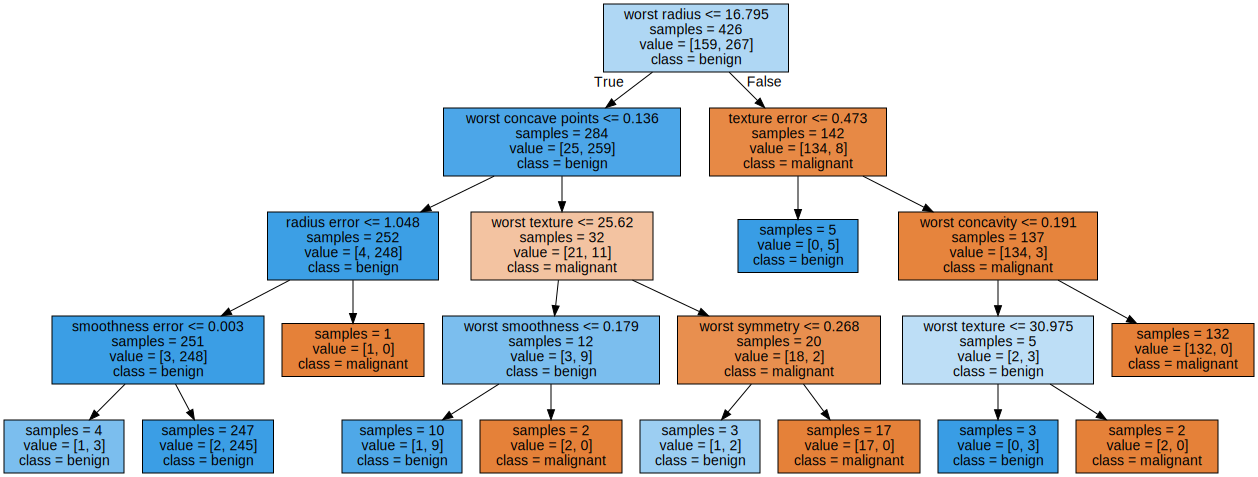

In [49]:
graphviz.Source(dot_graph)

- La ***visualización del árbol ofrece una comprensión profunda de las predicciones del algoritmo y es un buen ejemplo para explicar a no expertos***. Sin embargo, un árbol de profundidad cuatro puede ser abrumador, y los de mayor profundidad (como uno de diez) son aún más complejos. Un método útil ***para inspeccionar el árbol es analizar el camino que siguen la mayoría de los datos***.
  
- ***En cada nodo, el número de muestras y su clasificación se muestran***, como en el caso del nodo donde un `"worst radius"` de 16.795 resulta en 8 muestras benignas y 134 malignas. La mayoría de las 142 muestras que van hacia la derecha terminan en la hoja derecha. Al ir a la izquierda, con un `"worst radius"` mayor a 16.795, encontramos 25 muestras malignas y 259 benignas; casi todas las benignas terminan en la segunda hoja a la derecha, mientras que otras hojas contienen muy pocas muestras.

## Características importantes en los árboles

- En lugar de mirar todo el árbol, lo que puede ser agotador, hay algunas ***propiedades útiles que podemos derivar para resumir el funcionamiento del árbol***. El resumen más utilizado es el de las ***características importantes, que califica la importancia de cada característica para la decisión que toma el árbol***. Es un número entre 0 y 1 para cada característica, donde ***0 significa "no se utiliza en absoluto"*** y ***1 significa "predice perfectamente el objetivo"***. Las características siempre suman 1

- Otra ***excelente manera de visualizar predicciones a partir de un random forest por ejemplo, es utilizando la librería*** [LIME](https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime/notebook) ***de Python***. Con esta librería se pueden generar por cada instancia, figuras de cartaterísticas importantes y representar sus probabilidades de pertenecer a la clase predicha (***pruebela en este ejemplo***). Para instalarla solo debe usar

````shell
pip install lime
````

- Procedemos a explorar la visualización de `feature_importances_`

In [50]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


- Podemos *visualizar las importancias de las características de forma similar a la forma en que visualizamos los coeficientes en el modelo lineal*

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

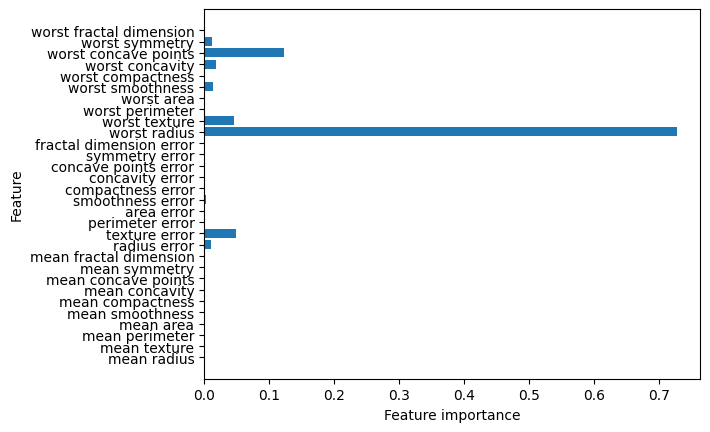

In [53]:
plot_feature_importances_cancer(tree)

- La característica `"worst radio"` ***es la más importante en la división superior***, lo que confirma que el primer nivel del árbol separa bien las dos clases. Sin embargo, ***un bajo valor de importancia de una característica no indica que sea poco informativa, sino que podría estar codificada por otra característica***. Un ***valor negativo de importancia sugiere que la característica aumenta la pérdida, lo que puede indicar un mal ajuste del modelo o que la característica no es útil***, y podría ser eliminada para mejorar el rendimiento.

- A diferencia de los coeficientes en modelos lineales, ***las importancias de las características son siempre positivas y no indican la clase que representa***. Así, aunque `"worst radio"` ***es importante, no especifica si un valor alto sugiere benignidad o malignidad***. Además, la relación entre características y clase no siempre es sencilla, como se muestra en un ejemplo donde *una característica tiene una relación no monótona con la etiqueta de clase¨*.

In [54]:
import mglearn

Feature importances: [0. 1.]


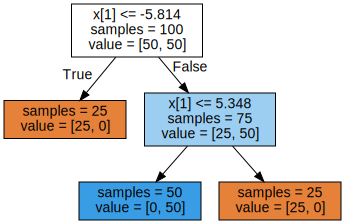

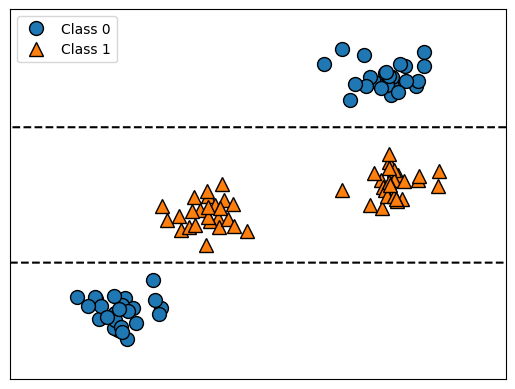

In [55]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- El gráfico muestra un conjunto de datos con dos características y dos clases. Aquí, toda la información está contenida en `X[1]` , y `X[0]` no se utiliza en absoluto. Pero la relación entre X[1] y la clase de salida no es monótona, lo que significa que no podemos decir ***"un valor alto de X[0] significa la clase 0, y un valor bajo significa la clase 1" (o viceversa)***. Aunque hemos centrado nuestra discusión aquí en los árboles de decisión para la clasificación, todo lo que se ha dicho es igualmente cierto para los árboles de decisión para la regresión, como se implementa en `DecisionTreeRegressor`. 

- El uso y análisis de los árboles de regresión es muy similar al de los árboles de clasificación. Hay una propiedad particular del uso de modelos basados en árboles para regresión que queremos señalar, sin embargo, ***DecisionTreeRegressor (y todos los otros modelos de regresión basados en árboles) no son capaces de extrapolar, o hacer predicciones fuera del rango de los datos de entrenamiento***. Veamos esto con más detalle, utilizando un conjunto de datos de los precios históricos de la memoria de los ordenadores (RAM). La siguiente figura muestra el conjunto de datos, con la fecha en el eje $x$ y el precio de un megabyte de RAM en ese año en el eje $y$:

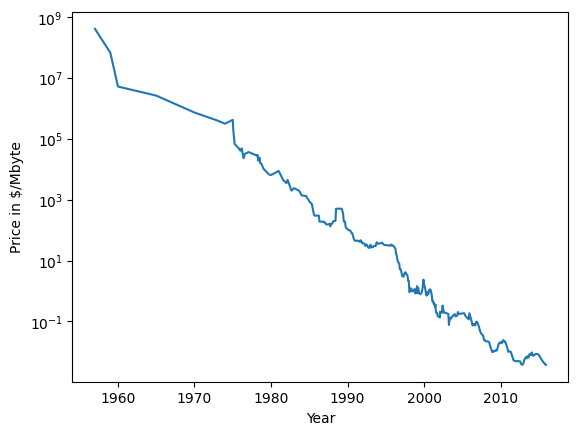

In [56]:
import pandas as pd
ram_prices = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/main/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price);
plt.xlabel("Year");
plt.ylabel("Price in $/Mbyte");

- Nótese que en la escala logarítmica del eje $y$, ***la relación parece ser bastante lineal y, por tanto, debería ser relativamente fácil de predecir***. Vamos a hacer una predicción para los años posteriores al 2000 utilizando los datos históricos hasta esa fecha como única característica. Compararemos dos modelos sencillos: un `DecisionTreeRegressor` y `LinearRegression`. 

- Cambiamos la escala de los precios utilizando un logaritmo, para que la relación sea relativamente lineal. Esto no supone ninguna diferencia para el `DecisionTreeRegressor`, pero supone una gran diferencia para el `LinearRegression`. Después de entrenar los modelos y hacer predicciones, aplicamos la función exponencial para deshacer la transformación del logaritmo. Realizamos predicciones sobre todo el conjunto de datos para su visualización, pero para una evaluación cuantitativa, sólo consideraríamos el conjunto de datos de prueba

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

- Utilizamos los datos históricos para prever los precios después del año 2000. ***Realizamos predicción de los precios en función de la fecha***. Utilizamos una transformación logarítmica para obtener una relación más sencilla de los datos con el objetivo

In [58]:
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

In [59]:
X_train = np.array(data_train.date)[:, None] # Vector columna
y_train = np.log(data_train.price)

In [60]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = np.array(ram_prices.date)[:, None]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

- Realizamos una figura para comparar las predicciones del árbol de decisión y del modelo de regresión lineal con la los datos reales de entrenamiento y de prueba

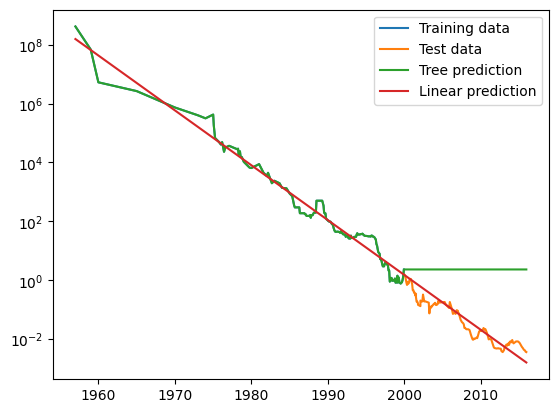

In [61]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend();

- La diferencia entre los modelos es bastante sorprendente. El modelo lineal se aproxima a los datos con una línea, como sabíamos que haría. Esta línea proporciona una previsión bastante buena para los datos de prueba (los años posteriores al 2000), mientras que pasa por alto algunas de las variaciones más finas en los datos de entrenamiento y de prueba. ***El modelo de árbol, por su parte, hace predicciones perfectas sobre los datos de entrenamiento***, no restringimos la complejidad del árbol, por lo que aprendió de memoria todo el conjunto de datos. Sin embargo, ***una vez que salimos del rango para el que el arbol tiene datos, el modelo simplemente sigue prediciendo el último punto conocido***. El árbol no tiene la capacidad para generar ***"nuevas"*** respuestas, fuera de lo que se vio en los datos de de entrenamiento. Esta deficiencia se aplica a todos los modelos basados en árboles.

````{admonition} Puntos fuertes, puntos débiles y parámetros
:class: tip

- Los ***parámetros de pre-selección en los árboles de decisión controlan la complejidad del modelo y evitan el sobreajuste*** deteniendo su construcción prematuramente. Configurar adecuadamente parámetros como `max_depth, max_leaf_nodes` y `min_samples_leaf` es crucial.

- Los ***árboles de decisión tienen ventajas significativas***: su modelo es ***fácilmente visualizable y comprensible para personas no expertas***, y son ***invariables a la escala de los datos***, eliminando la necesidad de normalización o estandarización. ***Funcionan bien con características de escalas diferentes y combinaciones de variables binarias y continuas***.

- Sin embargo, su ***principal desventaja es la tendencia al sobreajuste***, lo que afecta su rendimiento de generalización. Por ello, ***se prefieren métodos combinados en la mayoría de las aplicaciones*** en lugar de usar un único árbol de decisión.
````

## Ensamble de árboles de decisión

- ***Los ensambles son métodos que combinan múltiples modelos de aprendizaje automático para crear modelos más potentes***. Hay muchos modelos en la literatura de aprendizaje automático que pertenecen a esta categoría, pero hay dos modelos de ensamble que han demostrado su eficacia en una amplia gama de conjuntos de datos de clasificación y regresión, ambos utilizan árboles de decisión como bloques de construcción: los `random forest` y los `gradient boosted decision trees.`

**`Bosques aleatorios`**

- Uno de los principales inconvenientes de los ***árboles de decisión es su tendencia al sobreajuste***. Los ***bosques aleatorios abordan este problema al combinar múltiples árboles de decisión, cada uno ligeramente diferente***. Aunque cada árbol predice razonablemente, tiende a ajustarse demasiado a los datos de manera particular. Al ***promediar los resultados de muchos árboles, podemos reducir el sobreajuste mientras mantenemos el poder predictivo***. Para implementar esta estrategia, es necesario ***construir múltiples árboles que sean efectivos y distintos***. La aleatorización se logra al seleccionar diferentes puntos de datos y características para cada árbol.

````{admonition} Construcción de bosques aleatorios
:class: information

- Para construir un modelo de bosque aleatorio, se debe ***definir el número de árboles*** (parámetro `n_estimators`). Supongamos que queremos construir 10 árboles, los cuales se crearán de manera independiente con elecciones aleatorias para asegurar su diversidad.

- ***Cada árbol se construye a partir de una muestra bootstrap***, que se obtiene seleccionando repetidamente ejemplos al azar con reemplazo de los datos originales. Esto resulta en un conjunto de datos del mismo tamaño que el original, pero con algunos puntos faltantes y otros repetidos.

- Por ejemplo, para la lista `[‘a’, ‘b’, ‘c’, ‘d’]`, una muestra bootstrap podría ser `[‘b’, ‘d’, ‘d’, ‘c’]`. Luego, se construye un árbol de decisión basado en esta muestra. ***El algoritmo se modifica para seleccionar aleatoriamente un subconjunto de características en cada nodo, controlado por el parámetro*** `max_features`. Esto asegura que cada árbol sea diferente, ya que cada nodo puede usar diferentes características.

- El parámetro `max_features` es crucial: si se establece en `n_features`, cada división puede evaluar todas las características, reduciendo la aleatoriedad. Si se fija en 1, cada división solo considera la característica seleccionada aleatoriamente, resultando en árboles más similares. Un `max_features` ***bajo genera árboles más diversos, que pueden necesitar ser más profundos para ajustarse bien a los datos***.

- Para hacer una ***predicción con el bosque aleatorio, se obtiene una predicción de cada árbol***. En ***regresión, se promedian estas predicciones; en clasificación, se utiliza una "votación suave", promediando las probabilidades de cada etiqueta y eligiendo la clase con la mayor probabilidad***.
````

**`Análisis de los bosques aleatorios`**. Apliquemos un bosque aleatorio compuesto por cinco árboles al conjunto de datos `two_moons`

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [63]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

- ***Los árboles que se construyen como parte del bosque aleatorio se almacenan en estimator_attribute***. Visualicemos los límites de decisión aprendidos por cada árbol, junto con su predicción agregada

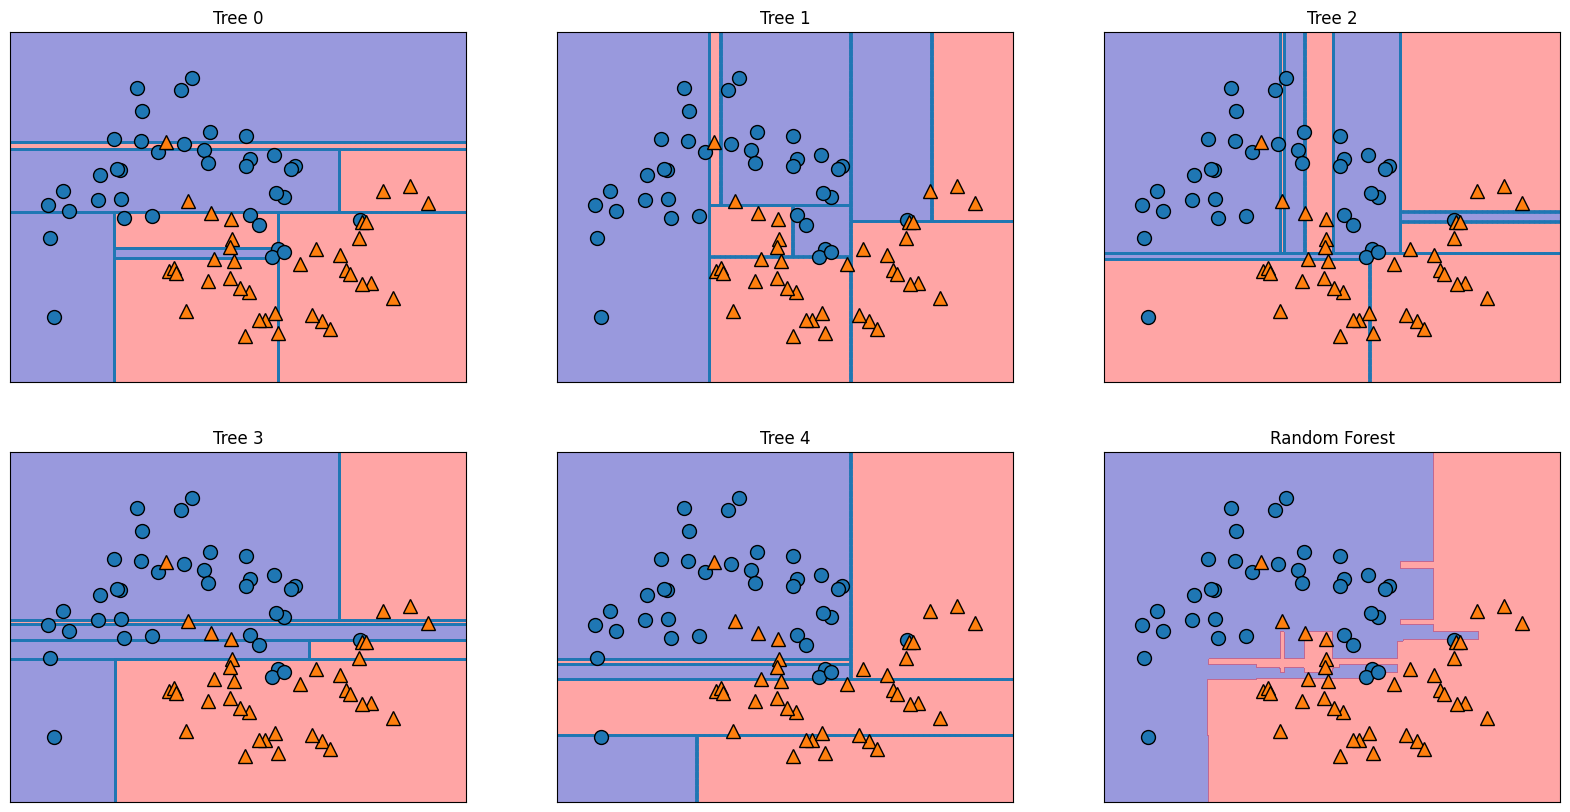

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

- Se puede ver claramente que los límites de decisión aprendidos por los cinco árboles son bastante diferentes. Cada uno de ellos comete algunos errores, ya que algunos de los puntos que se representan aquí no se incluyeron en los conjuntos de entrenamiento de los árboles, debido al muestreo bootstrap. ***El bosque aleatorio se ajusta menos que cualquiera de los árboles por separado y proporciona un límite de decisión mucho más intuitivo***. En cualquier aplicación real, utilizaríamos muchos más árboles (a menudo cientos o miles), lo que daría lugar a límites aún más suaves.

- Como otro ejemplo, apliquemos un bosque aleatorio compuesto por 100 árboles en el conjunto de datos ***Breast Cancer***

In [66]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


- ***El bosque aleatorio nos da una precisión del 97%, mejor que los modelos lineales o un árbol de decisión único, sin necesidad de ajustar ningún parámetro***. Podríamos ajustar la configuración de `max_features`, o aplicar la pre-selección como hicimos con el árbol de decisión simple. Sin embargo, a menudo los parámetros por defecto del bosque aleatorio ya funcionan bastante bien. ***Al igual que el árbol de decisión, el bosque aleatorio proporciona importancias de características, que se calculan agregando las importancias de las características en los árboles del bosque***. Normalmente, las ***importancias de las características proporcionadas por el bosque aleatorio son más fiables que las proporcionadas por un solo árbol***.

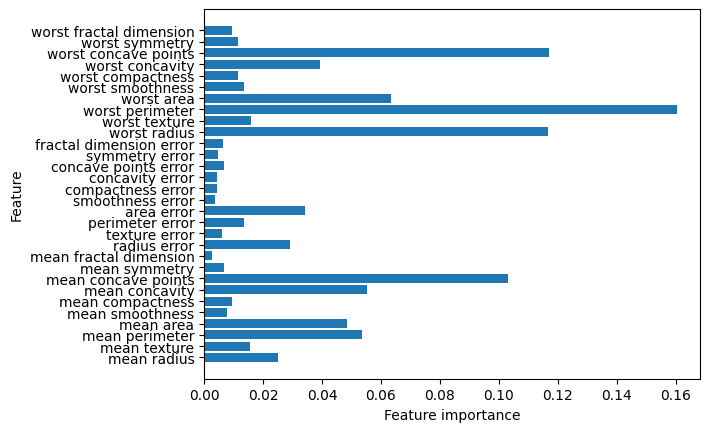

In [68]:
plot_feature_importances_cancer(forest)

- Como puede ver, ***el bosque aleatorio da una importancia no nula a muchas más características que el árbol simple***. Al igual que el árbol de decisión simple, el bosque aleatorio también da importancia a la característica ***"worst radius"***, pero en realidad elige ***"worst perimeter"*** como la ***característica más informativa***. ***La aleatoriedad en la construcción del bosque aleatorio obliga al algoritmo a considerar muchas explicaciones posibles***. El resultado es que el bosque aleatorio capta una imagen mucho más amplia de los datos que un árbol simple.

```{admonition} Observación
:class: tip

La ***importancia de la característica*** se calcula como la disminución de la impureza del nodo ponderada por la probabilidad de alcanzar ese nodo. ***La probabilidad del nodo puede calcularse mediante el número de muestras que llegan al nodo, dividido por el número total de muestras. Cuanto mayor sea el valor, más importante será la característica***.La ***impureza de Gini*** se calcula mediante la formula usada al inicio de esta sección

$$
I(t)=\sum_{m=1}^{M}P(\omega_{m}|t)(1-P(\omega_{m}|t)).
$$

```

````{admonition} Puntos fuertes y débiles de los bosques aleatorios
:class: tip

- Los bosques aleatorios son métodos populares de aprendizaje automático para regresión y clasificación, conocidos por su ***eficacia sin requerir ajustes extensos de parámetros y sin necesidad de escalar datos***. Aunque comparten las ventajas de los árboles de decisión, son ***menos interpretables debido a la complejidad de múltiples árboles***. Para visualizaciones simples, un árbol de decisión único es preferible.

- La ***construcción de bosques aleatorios en grandes conjuntos de datos puede ser lenta***, pero se puede paralelizar utilizando ***múltiples núcleos de CPU con el parámetro*** `n_jobs`, optimizando la velocidad de entrenamiento. Es importante fijar el parámetro `random_state` para reproducibilidad, ya que *la aleatoriedad puede afectar el modelo*. Estos bosques ***no son efectivos con datos escasos y de alta dimensionalidad***, donde los modelos lineales suelen ser más adecuados.

- Los bosques aleatorios ***requieren más memoria y tiempo en comparación con los modelos lineales***, lo que puede ser un factor limitante. Los parámetros clave a ajustar son `n_estimators`, `max_features`, y potencialmente `max_depth`. Un ***mayor número de árboles mejora la robustez al reducir el sobreajuste***, aunque se deben considerar los rendimientos decrecientes en tiempo y memoria. Se recomienda ***utilizar configuraciones predeterminadas como*** `max_features=sqrt(n_features)` para clasificación y `max_features=log2(n_features)` para regresión, con la posibilidad de optimizar aún más el rendimiento mediante ajustes adicionales.
````

````{admonition} Árboles de regresión de gradiente reforzado (máquinas de gradiente reforzado)
:class: information

- El árbol ***regresión de gradiente reforzado*** es un método de conjunto que combina múltiples árboles de decisión para regresión y clasificación. A diferencia de los bosques aleatorios, ***construye árboles en serie, donde cada árbol corrige los errores del anterior, utilizando una pre-poda fuerte y árboles poco profundos*** (de una a cinco profundidades) para mejorar la eficiencia y velocidad de las predicciones.

- El enfoque se basa en ***combinar modelos simples (aprendices débiles) para mejorar el rendimiento***. Aunque es más sensible a la configuración de parámetros que los bosques aleatorios, puede lograr mayor precisión si se ajustan correctamente. Los parámetros clave incluyen la ***tasa de aprendizaje, que determina cuán intensamente cada árbol corrige los errores***, y el ***número de árboles en el conjunto*** (`n_estimators`), lo que ***afecta la complejidad del modelo***.
````

- Este es un ejemplo del uso del clasificador `GradientBoosting` en el conjunto de datos del ***Breast Cancer***. Por defecto, se utilizan 100 árboles de profundidad máxima 3 y una tasa de aprendizaje de 0.1

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
cancer = load_breast_cancer()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


- Como la ***precisión del conjunto de entrenamiento es del 100%, es probable que estemos sobreajustando. Para reducir el sobreajuste, podemos aplicar una pre-poda más fuerte limitando la profundidad máxima o reducir la tasa de aprendizaje***

In [71]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [72]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


- Ambos métodos para disminuir la complejidad del modelo ***redujeron la precisión del conjunto de entrenamiento, como era de esperar***. En este caso, ***la reducción de la profundidad máxima de los árboles proporcionó una mejora significativa del modelo, mientras que la reducción de la tasa de aprendizaje sólo aumentó la precisión del conjunto de entrenamiento ligeramente***. En cuanto a los otros modelos basados en árboles de decisión, podemos volver a visualizar las características para obtener más información sobre nuestro modelo. Como utilizamos 100 árboles, es poco práctico inspeccionarlos todos, aunque todos tengan una profundidad de 1.

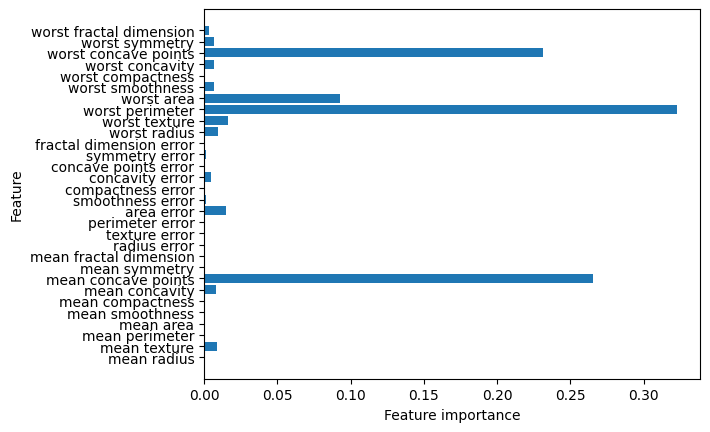

In [73]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

- Podemos ver que las importancias de las características de los árboles `gradient-boost` son algo similares a las de los bosques aleatorios, aunque el refuerzo del gradiente ignora por completo algunas de las características. Como tanto el refuerzo de gradiente como los bosques aleatorios funcionan bien en tipos de datos similares, ***un enfoque común es probar primero los bosques aleatorios, que funcionan con bastante solidez. Si los bosques aleatorios funcionan bien, pero el tiempo de predicción es un problema, o si es importante exprimir el último porcentaje de precisión del modelo de aprendizaje automático, pasar a la refuerzo por gradiente suele ser útil***.

- **`Si quiere aplicar el refuerzo de gradiente a un problema a gran escala, puede que merezca la pena investigar el paquete xgboost y su interfaz de Python, que hasta el momento es más rápido (y a veces más fácil de usar) que la implementación de scikit-learn en muchos conjuntos de datos`**.

In [74]:
import lime
import lime.lime_tabular

- Creamos un objeto `LimeTabularExplainer` de la biblioteca `LIME` para ***explicar predicciones de un modelo de clasificación basado en datos tabulares***. Este objeto es esencial para generar explicaciones locales de cómo el modelo toma decisiones en una instancia específica

In [75]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,               
    feature_names=cancer.feature_names,   
    class_names=cancer.target_names,      
    mode='classification'                 
)

- Seleccionamos una ***instancia específica del conjunto de prueba*** (`X_test`) y ***preparándola para que el modelo la utilice en una predicción***

In [76]:
i = 100
instance = X_test[i].reshape(1, -1)

- Las siguientes líneas de código utilizan `LIME (Local Interpretable Model-agnostic Explanations)` para ***explicar las predicciones del modelo*** `Gradient Boosting Classifier`

In [77]:
exp = explainer.explain_instance(
    data_row=X_test[i],                    # Punto de datos a explicar
    predict_fn=gbrt.predict_proba          # Función de predicción del modelo
)

- `exp.show_in_notebook(show_table=True, show_all=False)` se encarga de ***mostrar los resultados de la explicación generada por el explainer***

In [78]:
exp.show_in_notebook(show_table=True, show_all=False)

- `exp.as_pyplot_figure()` genera una figura que ***visualiza la explicación de las predicciones en un formato compatible con*** `Matplotlib`.

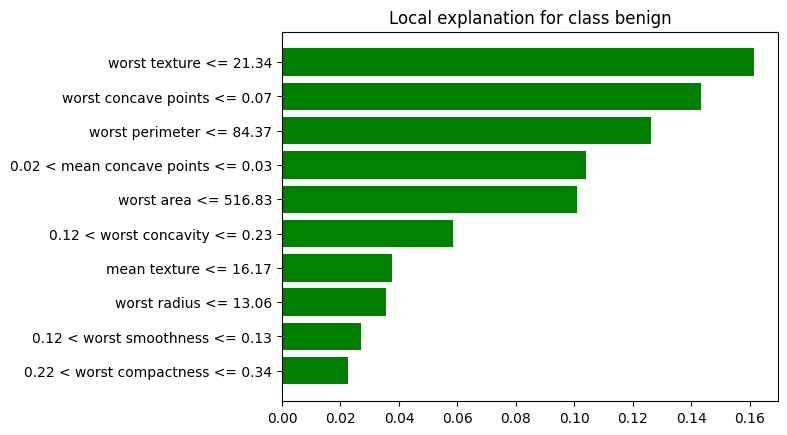

In [79]:
exp.as_pyplot_figure()
plt.show()

Los siguientes son los significados de cada color mostrado en cada barra, el cual también está relacioando con la entropía. A continuación, se agrega otro ejemplo, el cual considera explicabilidad para la observbación `ì=10`

- `Barras verdes`: Las *características están favoreciendo la clase predicha* (por ejemplo, "benign").
- `Barras rojas`: Las *características están empujando hacia la clase opuesta* (por ejemplo, "malignant").
- `La longitud de las barras` representa la *importancia de cada característica en la predicción, medida a través de su impacto en la entropía de las predicciones*.
- `Prediction probabilities` representa la *probabilidad de que el modelo prediga una determinada clase* o resultado para un dato específico.

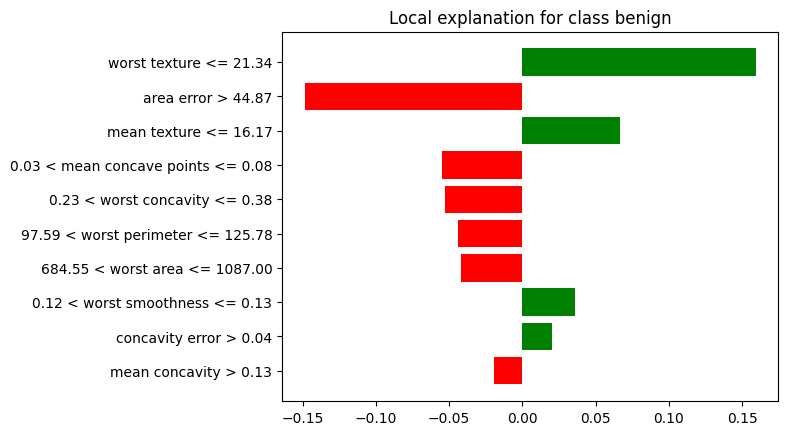

In [80]:
i = 10
instance = X_test[i].reshape(1, -1)

exp = explainer.explain_instance(
    data_row=X_test[i],                    # Punto de datos a explicar
    predict_fn=gbrt.predict_proba          # Función de predicción del modelo
)

exp.show_in_notebook(show_table=True, show_all=False)
exp.as_pyplot_figure()
plt.show()

- En resumen, `LIME` es una herramienta valiosa para ***aumentar la interpretabilidad y la confianza en modelos de aprendizaje automático***, permitiendo a los usuarios ***comprender y validar las decisiones de los modelos de manera efectiva***.

- Si deseas ***mayor capacidad de cómputo, para realizar por ejemplo una validación cruzada***, puedes utilizar [XGBoost GPU Support](https://xgboost.readthedocs.io/en/release_1.3.0/gpu/index.html). Antés, debes seguir la guía de instalación ( ver [Installation Guide](https://xgboost.readthedocs.io/en/release_1.3.0/build.html)) y además, verificar que tiene instalado CUDA. Una vez instalado, puedes proceder a utilizar `XGBoost`, ***habilitando el soporte para GPU con el parámetro*** `tree_method='gpu_hist'`.

In [22]:
import warnings
warnings.filterwarnings('ignore')
import mglearn
import matplotlib

In [23]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
import time
import os
import joblib

In [24]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

- Confirmamos que el modelo está ***configurado para usar GPU***

In [25]:
model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, verbosity=2)
print("Modelo configurado con tree_method='gpu_hist'")

Modelo configurado con tree_method='gpu_hist'


In [26]:
params = {
    'max_depth': [3, 4, 5, 6, 7],  # Rango para la profundidad del árbol
    'learning_rate': [0.1, 0.2, 0.3],  # Rango para la tasa de aprendizaje
    'n_estimators': [100, 200, 300],  # Número de árboles a entrenar
}

In [27]:
grid_search = GridSearchCV(model, params, scoring='roc_auc', cv=5, verbose=1)

In [29]:
model_filename = 'best_xgboost_model.pkl'
model = None

if os.path.exists(model_filename):
    print(f"El modelo ya existe. Cargando desde {model_filename}...")
    model = joblib.load(model_filename)
else:
    print("El modelo no existe. Entrenando un nuevo modelo...")
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print("Mejores parámetros:", grid_search.best_params_)
    print("Mejor AUC en prueba:", grid_search.best_score_)
    print(f"Tiempo de cómputo: {elapsed_time:.2f} segundos")

    joblib.dump(grid_search.best_estimator_, model_filename)
    print(f"Modelo guardado como {model_filename}")
    
    model = grid_search.best_estimator_

El modelo no existe. Entrenando un nuevo modelo...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Mejor AUC en prueba: 0.991728305831699
Tiempo de cómputo: 79.94 segundos
Modelo guardado como best_xgboost_model.pkl


In [30]:
model_params = {key: value for key, value in model.get_params().items() if value is not None}
print("Parámetros del modelo:", model_params)

Parámetros del modelo: {'objective': 'binary:logistic', 'enable_categorical': False, 'learning_rate': 0.2, 'max_depth': 5, 'missing': nan, 'n_estimators': 200, 'tree_method': 'gpu_hist', 'verbosity': 2, 'use_label_encoder': False}


- Para estar completamente seguro que utilizó su GPU durante la fase de entrenamiento, puede ***verificar que este dispositivo dedicado se encuentra activo en su administrador de tareas***

````{figure} ./imgs/gpu_xgboost.png
:name: gpu_xgboost_fig
:align: center
:scale: 35

Uso de GPU durante la fase de entrenamiento usando `XGBoost GPU Support`.
````

````{admonition} Puntos fuertes, puntos débiles y parámetros
:class: important

- Los árboles de decisión con refuerzo de gradiente se encuentran entre los modelos más potentes y utilizados para el aprendizaje supervisado. ***Su principal inconveniente es que requieren un ajuste cuidadoso de los parámetros y pueden tardar mucho tiempo de entrenamiento***. Al igual que otros modelos basados en árboles, el algoritmo funciona bien sin escalar y con una mezcla de características binarias y continuas. Al igual que otros modelos basados en árboles tampoco suele funcionar bien con datos dispersos de alta dimensión.

- Los principales parámetros de los modelos de árbol de gradiente reforzado son el número de árboles, `n_estimators`, y el `learning_rate` que ***controla el grado en que cada árbol puede corregir los errores de los árboles anteriores***. Estos dos parámetros están muy interconectados, ya que una tasa de aprendizaje más baja significa que se necesitan más árboles para construir un modelo de complejidad similar. A diferencia de los bosques aleatorios, en los que un valor de `n_estimators` es siempre mejor, el aumento de `n_estimators` en el `gradient boosting` conduce a un modelo más complejo, lo que puede llevar a un sobreajuste. Una práctica común es ajustar `n_estimators` dependiendo del presupuesto de tiempo y memoria, y luego buscar sobre diferentes tasas de aprendizaje.

- Otro parámetro importante es `max_depth` (o alternativamente `max_leaf_nodes`), para reducir la complejidad de cada árbol. ***Por lo general, la profundidad máxima es muy baja para los modelos de gradiente, a menudo no más allá de cinco divisiones***
````

## Proyecto Integrador de Aprendizaje Automático

### Predicción de churn en telecomunicaciones con modelos de árboles e interpretabilidad



### Objetivo general

Construir modelos precisos de clasificación utilizando algoritmos como Random Forest, XGBoost, CatBoost y LightGBM, integrados en un flujo de trabajo con `Pipeline`, ajuste de hiperparámetros mediante `GridSearchCV`, visualización de importancia de variables y uso de LIME para explicabilidad. Además, se solicita diseñar una arquitectura básica de MLOps para implementar el modelo en un entorno de producción.



### Contexto aplicado

Las empresas de telecomunicaciones enfrentan tasas significativas de pérdida de clientes. La predicción temprana del churn permite intervenir de manera oportuna. A través de modelos supervisados e interpretables, se puede identificar el perfil de clientes con mayor probabilidad de abandono y tomar decisiones informadas.



### Dataset recomendado: "Telco Customer Churn" (Kaggle)

* Enlace: [https://www.kaggle.com/blastchar/telco-customer-churn](https://www.kaggle.com/blastchar/telco-customer-churn)
* Tamaño aproximado: 7 000 registros
* Contiene información demográfica, de facturación y uso de servicios, junto con la variable objetivo `Churn` (Sí/No)



### Actividades a desarrollar

1. **Preprocesamiento**

   * Limpieza de datos y tratamiento de valores faltantes
   * Codificación de variables categóricas
   * Escalado de variables numéricas si es necesario
   * Separación en variables predictoras `X` y variable objetivo `y`

2. **Modelado con Pipelines y GridSearchCV**

   * Definir pipelines que incluyan transformaciones y modelo
   * Ajustar hiperparámetros mediante `GridSearchCV`:

     * Random Forest: `n_estimators`, `max_depth`
     * XGBoost: `n_estimators`, `max_depth`, `learning_rate`
     * CatBoost: `iterations`, `learning_rate`, `depth`
     * LightGBM: `num_leaves`, `learning_rate`, `n_estimators`
   * Validación cruzada estratificada con cinco particiones

3. **Evaluación del modelo**

   * Cálculo de métricas: exactitud, precisión, recall, F1-score, AUC-ROC
   * Matriz de confusión
   * Curvas ROC por modelo
   * Comparación gráfica del desempeño

4. **Importancia de características**

   * Extraer `feature_importances_` de cada modelo
   * Graficar las 10 variables más importantes para cada clasificador

5. **Explicación de predicciones con LIME**

   * Aplicar `LimeTabularExplainer` sobre instancias específicas
   * Visualizar y analizar las explicaciones para al menos tres casos representativos

6. **Diseño de arquitectura MLOps**

   * Crear un servicio de inferencia con FastAPI que reciba datos nuevos y retorne predicciones
   * Empaquetar el modelo y la API en una imagen Docker (`Dockerfile`)
   * Crear un flujo de trabajo CI/CD con GitHub Actions que:

     * Ejecute pruebas unitarias
     * Verifique calidad del código (linting)
     * Construya y publique la imagen Docker si las pruebas son exitosas
   * Incluir sugerencias para monitoreo del modelo (deriva de datos, métricas de producción)



### Restricciones didácticas

* Es obligatorio el uso de `Pipeline` y `GridSearchCV`
* No se permite el uso de AutoML
* Se deben presentar visualizaciones claras y código documentado
* El trabajo debe entregarse como notebook reproducible, con todas las decisiones justificadas



### Herramientas sugeridas

* `pandas`, `numpy`, `scikit-learn`
* `xgboost`, `catboost`, `lightgbm`
* `matplotlib`, `seaborn`
* `lime`
* `fastapi`, `docker`, `GitHub Actions`
* Entorno: Jupyter Notebook, Google Colab o VS Code



### Entregables esperados

* Notebook con desarrollo completo: exploración, modelado, evaluación, visualización y análisis
* Script de la API (`api.py`) basado en FastAPI
* Dockerfile funcional con instrucciones de ejecución
* Flujo de trabajo CI/CD (`.github/workflows/ci.yml`)
* Archivo README con descripción del proyecto, instrucciones de uso y arquitectura del servicio



### Diseño sugerido del notebook

1. Exploración inicial del dataset
2. Preprocesamiento y codificación
3. Implementación de pipelines
4. Entrenamiento y ajuste con `GridSearchCV`
5. Evaluación de modelos
6. Importancia de características
7. Interpretabilidad con LIME
8. Descripción del sistema de despliegue
9. Conclusiones finales


### Resumen

| Dataset                       | Tarea         | Tamaño estimado   | Ventajas                                    |
| ----------------------------- | ------------- | ----------------- | ------------------------------------------- |
| Telco Customer Churn (Kaggle) | Clasificación | \~7 000 registros | Real, variables heterogéneas, interpretable |

### Instrucciones para el MLOps

- Para construir el **entorno de MLOps** correspondiente al problema planteado, es necesario **instalar las bibliotecas específicas asociadas al despliegue y automatización del flujo de trabajo**, además de aquellas requeridas por el modelo y el análisis exploratorio de datos (EDA), con el fin de garantizar su correcto funcionamiento.

````shell
python -m pip install --force-reinstall pydantic
python -m pip install fastapi[all]
python -m pip install joblib
python -m pip install pandas
````

### Estructura general del proyecto

```shell
telco-churn-mlops/
├── data/
│   └── telco_churn.csv                  # Dataset original
├── notebooks/
│   ├── 1_eda_preprocessing.ipynb        # Análisis exploratorio
│   ├── 2_model_training.ipynb           # Entrenamiento y evaluación
│   └── 3_interpretability.ipynb         # LIME y SHAP
├── app/
│   ├── api.py                           # FastAPI para inferencia
│   ├── schemas.py                       # Modelos Pydantic
│   └── model.joblib                     # Modelo entrenado
├── tests/
│   ├── test_api.py                      # Pruebas unitarias
│   └── test_model.py                    # Validación del modelo
├── Dockerfile                           # Configuración de contenedor
├── requirements.txt                     # Dependencias
├── .github/workflows/
│   └── ci.yml                           # CI/CD con GitHub Actions
└── README.md                            # Documentación
```

### `api.py` — Servicio FastAPI para predicciones
```python
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI()
model = joblib.load("app/model.joblib")

class CustomerData(BaseModel):
    SeniorCitizen: int
    MonthlyCharges: float
    TotalCharges: float
    Contract: str  # "Month-to-month", "One year", etc.
    PaymentMethod: str  # "Electronic check", "Credit card", etc.

@app.post("/predict")
def predict(data: CustomerData):
    # Preprocesamiento en memoria (ejemplo simplificado)
    features = np.array([
        data.SeniorCitizen,
        data.MonthlyCharges,
        data.TotalCharges,
        1 if data.Contract == "Month-to-month" else 0,
        1 if data.PaymentMethod == "Electronic check" else 0
    ]).reshape(1, -1)
    
    prediction = model.predict_proba(features)[0][1]  # Probabilidad de churn
    return {"churn_probability": float(prediction), "prediction": int(prediction > 0.5)}
```

### `Dockerfile` — Contenerización

```docker
FROM python:3.10-slim

WORKDIR /app
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY app/ ./app/
COPY data/ ./data/

EXPOSE 8000
CMD ["uvicorn", "app.api:app", "--host", "0.0.0.0", "--port", "8000"]
```

### `requirements.txt`

- Este archivo puede generarse de manera automática mediante el comando `pip freeze > requirements.txt`, siempre que se ejecute desde el entorno virtual previamente configurado para el desarrollo del entorno MLOps.

```shell
fastapi>=0.95.0
uvicorn
scikit-learn
pandas
numpy
joblib
lime
xgboost
catboost
lightgbm
```

### `.github/workflows/ci.yml` — CI/CD Pipeline

```yaml
name: CI Pipeline
on: [push, pull_request]

jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v3
      - name: Set up Python
        uses: actions/setup-python@v4
        with:
          python-version: 3.10
      - name: Install dependencies
        run: |
          pip install -r requirements.txt
          pip install pytest flake8
      - name: Run Linter
        run: flake8 app/ --ignore=E501,W503
      - name: Run Tests
        run: pytest tests/
```

### `README.md` — Documentación

````markdown
# Predicción de Churn en Telecomunicaciones

## Descripción
Proyecto de ML para predecir abandono de clientes (churn) usando Random Forest, XGBoost y técnicas de interpretabilidad.

## Componentes
- `notebooks/`: Análisis, entrenamiento y explicabilidad.
- `app/api.py`: API REST para predicciones.
- `Dockerfile`: Configuración para despliegue.

## Instalación
```bash
pip install -r requirements.txt
uvicorn app.api:app --reload  # Desarrollo local
```

## Docker
```bash
docker build -t telco-churn-api .
docker run -p 8000:8000 telco-churn-api
```

## Endpoints
- `POST /predict`: Recibe JSON con features del cliente, retorna probabilidad de churn.
````

### Ejecución de pruebas

- Localmente, ejecutando en la terminal: `uvicorn app.api:app --port 8001`, el servidor **FastAPI** queda **corriendo en segundo plano, listo para ejecutar algunas pruebas**.

- El siguiente es un ejemplo de **test unitario local** usando `uvicorn`

    ````shell
    curl -X POST http://localhost:8001/predict   -H "Content-Type: application/json"   -d '{"SeniorCitizen": 1, "MonthlyCharges": 99.9, "tenure": 5, "Contract": "Month-to-month", "PaymentMethod": "Bank transfer (automatic)"}'
    ````

    La salida de este test debe ser la predicción con su respectiva probabilidad:

    ````shell
    {"churn_probability":0.96,"prediction":"Yes"}
    ````

- **Entrada (Input)**: Se está haciendo una solicitud **POST** (envío de datos) a una API que está escuchando localmente en:

```shell
http://localhost:8001/predict
```

- Lo que enviamos es un **JSON** que representa las características de un cliente, por ejemplo:

| Campo            | Significado                                         | Valor enviado                 |
| ---------------- | --------------------------------------------------- | ----------------------------- |
| `SeniorCitizen`  | Indica si el cliente es adulto mayor (1: sí, 0: no) | `1`                           |
| `MonthlyCharges` | Cuánto paga el cliente al mes                       | `99.9`                        |
| `tenure`         | Antigüedad en meses como cliente                    | `5`                           |
| `Contract`       | Tipo de contrato que tiene el cliente               | `"Month-to-month"`            |
| `PaymentMethod`  | Método de pago                                      | `"Bank transfer (automatic)"` |

- **Idea clave:** Le estamos preguntando al modelo: “¿Qué probabilidad tiene este cliente de irse (churn) dadas estas características?”

- **Salida (Output)**: El servidor devuelve también un **JSON** como respuesta:

```json
{"churn_probability":0.96,"prediction":"Yes"}
```

| Campo               | Significado                                                                                                                                          |
| ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| `churn_probability` | Probabilidad calculada por el modelo de que el cliente abandone la compañía (valor entre 0 y 1). En este caso, `0.96` indica un 96% de probabilidad. |
| `prediction`        | Predicción final del modelo: `"Yes"` indica que el modelo predice que el cliente probablemente se irá.                                               |

- Para poder realizar estas **pruebas desde el contenedor Docker de forma persistente y poder iniciarlo/detenerlo fácilmente** desde su aplicación, debe tener en cuenta estos pasos:

1. **Construir y Ejecutar por Primera Vez** (crea el contenedor persistente). Nótese que se usó un puerto diferente al local. Además, recuerde que debe tener iniciada la aplicación `Docker`

````shell
docker build -t telco-churn . && docker run -d --name telco-churn-container -p 8000:8000 telco-churn
````

2. Utilizamos los siguientes pasos para `iniciar,` `detener` y `ver estado`

````shell
docker start telco-churn-container
docker stop telco-churn-container
docker ps -a | grep telco-churn
````

3. El siguiente es un ejemplo de **test unitario desde `Docker`** usando `uvicorn` 

    ````shell
    curl -X POST http://localhost:8000/predict   -H "Content-Type: application/json"   -d '{"SeniorCitizen": 1, "MonthlyCharges": 99.9, "tenure": 5, "Contract": "Month-to-month", "PaymentMethod": "Bank transfer (automatic)"}'
    ````

    La salida de este test debe ser la predicción con su respectiva probabilidad:

    ````shell
    {"churn_probability":0.96,"prediction":"Yes"}
    ````